# OSM exploratory analysis

### *Q?* what road network should we choose? Is there an official opensourced road network?
### *Quick Answer:* No, there's no official opensourced road network in Thailand from DOH, DRR.
- Department of Highway
- Department of Rural Highway

https://data.humdata.org/dataset/hotosm_tha_roads

https://download.geofabrik.de/asia/thailand-250902-free.shp.zip

Highway -> "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link"

Rural Highway -> "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"


Important columns -> highway, osm_id

In [4]:
import geopandas as gpd

road_network = gpd.read_file('roadnetwork/hotosm_tha_roads_lines_shp/hotosm_tha_roads_lines_shp.shp')

In [2]:
road_network.columns

Index(['name', 'name_en', 'highway', 'surface', 'smoothness', 'width', 'lanes',
       'oneway', 'bridge', 'layer', 'source', 'name_th', 'osm_id', 'osm_type',
       'geometry'],
      dtype='object')

In [3]:
road_network['highway'].unique()

array(['service', 'secondary_link', 'residential', 'track', 'footway',
       'path', 'tertiary', 'secondary', 'trunk', 'unclassified', 'steps',
       'tertiary_link', 'primary', 'primary_link', 'trunk_link', 'road',
       'motorway_link', 'living_street', 'cycleway', 'pedestrian',
       'motorway', 'corridor', 'construction', 'busway', 'bridleway',
       'platform', 'no', 'raceway', 'escape', 'proposed', 'ladder',
       'abandoned'], dtype=object)

In [ ]:
road_network_TRAMS = road_network[road_network['highway'].isin([
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"
])]

In [116]:
road_network_TRAMS

name                 name_en         highway   surface  \
1                     None                    None  secondary_link      None   
47                    None                    None        tertiary      None   
60             ถนนเพชรเกษม         Phet Kasem Road       secondary      None   
61       ถนนศุภสารรังสรรค์  Thanon Suphasanrangsan        tertiary      None   
65                    None                    None        tertiary      None   
...                    ...                     ...             ...       ...   
2804390      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804391      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804392      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804393        ถนนศรีสะเกษ          Si Sa Ket Road         primary   asphalt   
2804395          ถนนศุภกิจ          Supphakit Road       secondary      None   

           smoothness width lanes oneway bridge layer            source  \
1                None  None  None    yes   None  None              None   
47               None  None  None   None   None  None  MapBox Satellite   
60               None  None     3    yes   None  None              None   
61               None  None  None   None   None  None              None   
65               None  None  None   None   None  None  MapBox Satellite   
...               ...   ...   ...    ...    ...   ...               ...   
2804390  intermediate    10     4   None   None  None              None   
2804391          good  None     2    yes   None  None              None   
2804392  intermediate  None     2    yes   None  None              None   
2804393          good  None     2    yes   None  None              None   
2804395          None  None  None   None   None  None              None   

               name_th      osm_id   osm_type  \
1                 None   472283206  ways_line   
47                None   279931743  ways_line   
60                None  1315837496  ways_line   
61                None  1315837497  ways_line   
65                None  1340170665  ways_line   
...                ...         ...        ...   
2804390  ถนนสรรพสิทธิ์   731012454  ways_line   
2804391  ถนนสรรพสิทธิ์   737773136  ways_line   
2804392  ถนนสรรพสิทธิ์   737773142  ways_line   
2804393    ถนนศรีสะเกษ   739002686  ways_line   
2804395      ถนนศุภกิจ    16242505  relations   

                                                  geometry       length  
1        LINESTRING (692949.15 1518859.803, 693039.638 ...   302.267819  
47       LINESTRING (1025201.59 1945835.81, 1025170.898...  4967.888534  
60       LINESTRING (662273.876 774830.89, 662266.234 7...    11.085677  
61       LINESTRING (662273.876 774830.89, 662255.953 7...    17.939892  
65       LINESTRING (1022042.972 1942658.098, 1022041.2...  4015.235516  
...                                                    ...          ...  
2804390  LINESTRING (1129662.894 1692866.916, 1129680.7...   859.003300  
2804391  LINESTRING (1130740.438 1692900.081, 1130726.6...   221.680443  
2804392  LINESTRING (1130521.095 1692886.745, 1130531.9...   221.053392  
2804393  LINESTRING (1126175.041 1687857.174, 1126149.9...    92.955789  
2804395  LINESTRING (725271.022 1514622.162, 725287.692...  1086.229032  

[111980 rows x 16 columns]

In [ ]:
# how many % each
road_network_TRAMS_count = road_network_TRAMS['highway'].value_counts()
highway_percentages = (road_network_TRAMS_count / road_network_TRAMS_count.sum()) * 100

# print
# highway counts
print("Highway Counts:")
print(road_network_TRAMS_count)

# highway percentages
print("\nHighway Percentages:")
print(highway_percentages)

Highway Counts:
highway
tertiary          34863
secondary         25995
primary           13926
trunk             13638
trunk_link         9411
primary_link       7135
secondary_link     5648
tertiary_link      1364
Name: count, dtype: int64

Highway Percentages:
highway
tertiary          31.133238
secondary         23.213967
primary           12.436149
trunk             12.178961
trunk_link         8.404179
primary_link       6.371674
secondary_link     5.043758
tertiary_link      1.218075
Name: count, dtype: float64


In [94]:
road_network_TRAMS

name                 name_en         highway   surface  \
1                     None                    None  secondary_link      None   
47                    None                    None        tertiary      None   
60             ถนนเพชรเกษม         Phet Kasem Road       secondary      None   
61       ถนนศุภสารรังสรรค์  Thanon Suphasanrangsan        tertiary      None   
65                    None                    None        tertiary      None   
...                    ...                     ...             ...       ...   
2804390      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804391      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804392      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
2804393        ถนนศรีสะเกษ          Si Sa Ket Road         primary   asphalt   
2804395          ถนนศุภกิจ          Supphakit Road       secondary      None   

           smoothness width lanes oneway bridge layer            source  \
1                None  None  None    yes   None  None              None   
47               None  None  None   None   None  None  MapBox Satellite   
60               None  None     3    yes   None  None              None   
61               None  None  None   None   None  None              None   
65               None  None  None   None   None  None  MapBox Satellite   
...               ...   ...   ...    ...    ...   ...               ...   
2804390  intermediate    10     4   None   None  None              None   
2804391          good  None     2    yes   None  None              None   
2804392  intermediate  None     2    yes   None  None              None   
2804393          good  None     2    yes   None  None              None   
2804395          None  None  None   None   None  None              None   

               name_th      osm_id   osm_type  \
1                 None   472283206  ways_line   
47                None   279931743  ways_line   
60                None  1315837496  ways_line   
61                None  1315837497  ways_line   
65                None  1340170665  ways_line   
...                ...         ...        ...   
2804390  ถนนสรรพสิทธิ์   731012454  ways_line   
2804391  ถนนสรรพสิทธิ์   737773136  ways_line   
2804392  ถนนสรรพสิทธิ์   737773142  ways_line   
2804393    ถนนศรีสะเกษ   739002686  ways_line   
2804395      ถนนศุภกิจ    16242505  relations   

                                                  geometry       length  
1        LINESTRING (692949.15 1518859.803, 693039.638 ...   302.267819  
47       LINESTRING (1025201.59 1945835.81, 1025170.898...  4967.888534  
60       LINESTRING (662273.876 774830.89, 662266.234 7...    11.085677  
61       LINESTRING (662273.876 774830.89, 662255.953 7...    17.939892  
65       LINESTRING (1022042.972 1942658.098, 1022041.2...  4015.235516  
...                                                    ...          ...  
2804390  LINESTRING (1129662.894 1692866.916, 1129680.7...   859.003300  
2804391  LINESTRING (1130740.438 1692900.081, 1130726.6...   221.680443  
2804392  LINESTRING (1130521.095 1692886.745, 1130531.9...   221.053392  
2804393  LINESTRING (1126175.041 1687857.174, 1126149.9...    92.955789  
2804395  LINESTRING (725271.022 1514622.162, 725287.692...  1086.229032  

[111980 rows x 16 columns]

In [ ]:
road_network_TRAMS = road_network_TRAMS.to_crs(epsg=32647)
# Calculate the length of each road segment in meters
road_network_TRAMS['length'] = road_network_TRAMS.geometry.length

# Group by highway class and sum the lengths
highway_distances = road_network_TRAMS.groupby('highway')['length'].sum()

# Convert to kilometers for better readability
highway_distances_km = highway_distances / 1000

# Print the distances
print("Highway Distances (in km):")
print(highway_distances_km)


# % by km
highway_distances_km_percent = (highway_distances_km / highway_distances_km.sum()) * 100
print("\nHighway Distances Percentages (by km):")
print(highway_distances_km_percent)


Highway Distances (in km):
highway
primary           13500.691043
primary_link        677.083870
secondary         36132.040850
secondary_link      526.786269
tertiary          69153.227482
tertiary_link       106.768552
trunk             16903.112011
trunk_link         1057.715863
Name: length, dtype: float64

Highway Distances Percentages (by km):
highway
primary            9.779040
primary_link       0.490436
secondary         26.171747
secondary_link     0.381570
tertiary          50.090190
tertiary_link      0.077336
trunk             12.243537
trunk_link         0.766142
Name: length, dtype: float64


In [56]:
# average, min, max distance of each road segment by type
by_type = road_network_TRAMS.groupby('highway')['length'].agg(['mean', 'min', 'max'])

print("Average length of each road segment (in km):", by_type['mean'] / 1000)
print("Minimum length of each road segment (in km):", by_type['min'] / 1000)
print("Maximum length of each road segment (in km):", by_type['max'] / 1000)


Average length of each road segment (in km): highway
primary           0.969459
primary_link      0.094896
secondary         1.389961
secondary_link    0.093270
tertiary          1.983571
tertiary_link     0.078276
trunk             1.239413
trunk_link        0.112391
Name: mean, dtype: float64
Minimum length of each road segment (in km): highway
primary           0.000504
primary_link      0.001901
secondary         0.000549
secondary_link    0.002610
tertiary          0.000544
tertiary_link     0.001947
trunk             0.001342
trunk_link        0.001589
Name: min, dtype: float64
Maximum length of each road segment (in km): highway
primary           59.746290
primary_link       2.223324
secondary         78.764529
secondary_link     2.035600
tertiary          76.352745
tertiary_link      7.160322
trunk             63.962530
trunk_link         4.517797
Name: max, dtype: float64


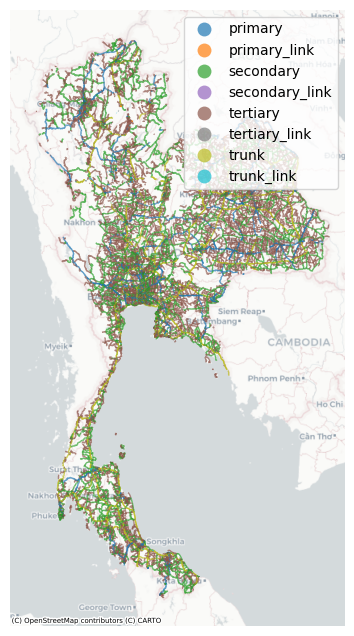

In [ ]:
# plot TRAMS on the map using basemap
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
road_network_TRAMS.to_crs(epsg=3857).plot(
    ax=ax, column='highway', legend=True, linewidth=1, alpha=0.7, cmap='tab10'
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)
ax.set_axis_off()
ax.legend(title='Highway', loc='lower right')


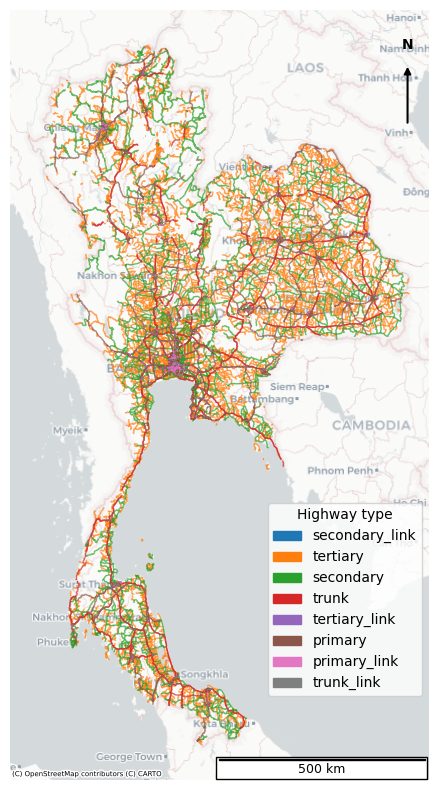

In [50]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.font_manager import FontProperties

# ---------- helpers ----------
def _nice_length_m(data_width_m):
    """Pick a nice scalebar length (1/2/5 × 10^n) ~ 1/5 of axis width."""
    target = data_width_m / 5.0
    import math
    exp = int(math.floor(math.log10(target))) if target > 0 else 0
    base = target / (10 ** exp)
    for b in (1, 2, 5, 10):
        if base <= b:
            return b * (10 ** exp)
    return 10 * (10 ** exp)

def add_scalebar(ax, loc="lower left", font_size=9, pad=0.2):
    """Add a scalebar (meters) to an EPSG:3857 axis."""
    xmin, xmax = ax.get_xlim()
    length_m = _nice_length_m(xmax - xmin)
    label = f"{int(length_m/1000)} km" if length_m >= 1000 else f"{int(length_m)} m"
    fp = FontProperties(size=font_size)
    sb = AnchoredSizeBar(ax.transData, length_m, label, loc,
                         pad=pad, color='black', frameon=True,
                         size_vertical=(xmax - xmin) * 0.003,
                         fontproperties=fp)
    ax.add_artist(sb)

def add_north_arrow(ax, xy=(0.8, 0.82), size=0.08, text="N", text_size=10):
    """Add a simple north arrow in axes fraction coords."""
    ax.annotate("", xy=(xy[0], xy[1] + size), xytext=xy,
                xycoords="axes fraction", textcoords="axes fraction",
                arrowprops=dict(arrowstyle="-|>", linewidth=1.5, color="black"))
    ax.text(xy[0], xy[1] + size + 0.015, text,
            transform=ax.transAxes, ha="center", va="bottom",
            fontsize=text_size, fontweight="bold")

# ---------- categorical plotting ----------
unique_vals = road_network_TRAMS['highway'].unique()
colors = plt.cm.tab10.colors  # 10-color palette
color_map = {val: colors[i % len(colors)] for i, val in enumerate(unique_vals)}

fig, ax = plt.subplots(figsize=(12, 8))

for val, color in color_map.items():
    subset = road_network_TRAMS[road_network_TRAMS['highway'] == val].to_crs(epsg=3857)
    subset.plot(ax=ax, color=color, linewidth=1, alpha=0.7, label=val)

# basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)

# legend
handles = [mpatches.Patch(color=color, label=val) for val, color in color_map.items()]
ax.legend(handles=handles, title="Highway type", loc="lower right", bbox_to_anchor=(1, 0.1))

# scale + north arrow
add_scalebar(ax, loc="lower right")
add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)

ax.set_axis_off()
plt.tight_layout()
plt.savefig('fig/TRAMS_road_network.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


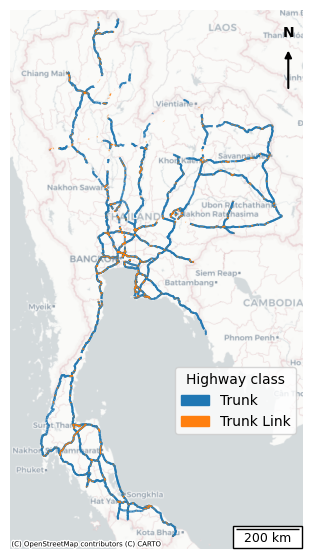

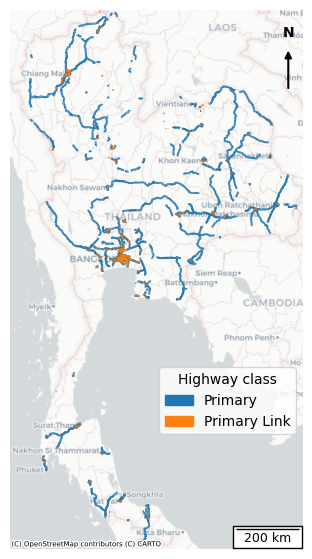

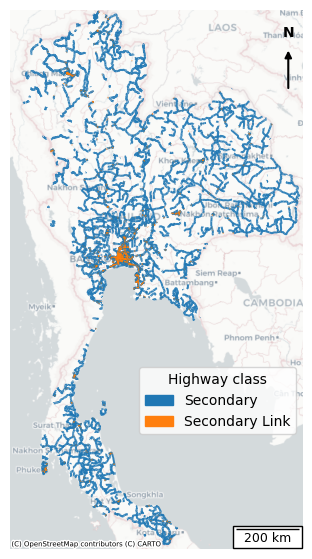

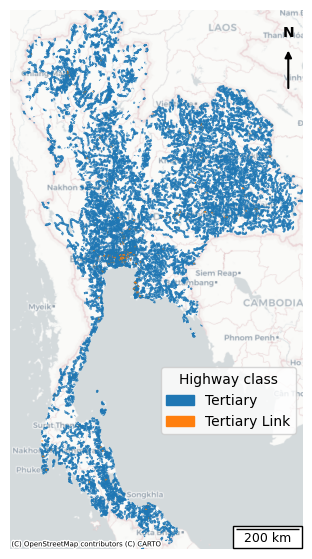

In [53]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import matplotlib.patches as mpatches
from pathlib import Path

# --- If you don't already have these helpers, uncomment this block ---
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
# from matplotlib.font_manager import FontProperties
# import math
# def _nice_length_m(data_width_m):
#     target = data_width_m / 5.0
#     exp = int(math.floor(math.log10(target))) if target > 0 else 0
#     base = target / (10 ** exp)
#     for b in (1, 2, 5, 10):
#         if base <= b:
#             return b * (10 ** exp)
#     return 10 * (10 ** exp)
# def add_scalebar(ax, loc="lower left", font_size=9, pad=0.2):
#     xmin, xmax = ax.get_xlim()
#     length_m = _nice_length_m(max(xmax - xmin, 1))
#     label = f"{int(length_m/1000)} km" if length_m >= 1000 else f"{int(length_m)} m"
#     sb = AnchoredSizeBar(ax.transData, length_m, label, loc,
#                          pad=pad, color='black', frameon=True,
#                          size_vertical=max((xmax - xmin), 1) * 0.003,
#                          fontproperties=FontProperties(size=font_size))
#     ax.add_artist(sb)
# def add_north_arrow(ax, xy=(0.08, 0.82), size=0.08, text="N", text_size=10):
#     ax.annotate("", xy=(xy[0], xy[1] + size), xytext=xy,
#                 xycoords="axes fraction", textcoords="axes fraction",
#                 arrowprops=dict(arrowstyle="-|>", linewidth=1.5, color="black"))
#     ax.text(xy[0], xy[1] + size + 0.015, text,
#             transform=ax.transAxes, ha="center", va="bottom",
#             fontsize=text_size, fontweight="bold")

# ---------- config ----------
pairs = [
    ("motorway",  "motorway_link"),
    ("trunk",     "trunk_link"),
    ("primary",   "primary_link"),
    ("secondary", "secondary_link"),
    ("tertiary",  "tertiary_link"),
]
main_color = "tab:blue"
link_color = "tab:orange"
outdir = Path("fig/")
outdir.mkdir(parents=True, exist_ok=True)

# ---------- prep ----------
rn_3857 = road_network_TRAMS.to_crs(3857)
all_bounds = rn_3857.total_bounds  # for consistent extent
xmin, ymin, xmax, ymax = all_bounds

for main, link in pairs:
    sub_main = rn_3857[rn_3857["highway"] == main]
    sub_link = rn_3857[rn_3857["highway"] == link]

    if sub_main.empty and sub_link.empty:
        # nothing to plot for this pair
        continue

    fig, ax = plt.subplots(figsize=(10, 7))

    # plot main first (thicker), then link (thinner)
    if not sub_main.empty:
        sub_main.plot(ax=ax, color=main_color, linewidth=1.4, alpha=0.9, zorder=3)
    if not sub_link.empty:
        sub_link.plot(ax=ax, color=link_color, linewidth=1.0, alpha=0.9, zorder=3)

    # basemap + consistent extent
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_axis_off()

    # legend (inside map, lower-right; nudge up with bbox_to_anchor)
    handles = []
    if not sub_main.empty:
        handles.append(mpatches.Patch(color=main_color, label=main.title()))
    if not sub_link.empty:
        handles.append(mpatches.Patch(color=link_color, label=link.replace("_", " ").title()))
    ax.legend(handles=handles, title="Highway class",
              loc="lower right", bbox_to_anchor=(1.0, 0.20), frameon=True)

    # north arrow + scalebar
    add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)
    add_scalebar(ax, loc="lower right")

    # title = f"{main.title()} & {link.replace('_', ' ').title()}"
    # ax.set_title(title, fontsize=13, pad=6)

    # save
    fname = f"pair_{main}.png"
    fig.savefig(outdir / fname, dpi=300, bbox_inches="tight", pad_inches=0)
    plt.show()
    plt.close(fig)


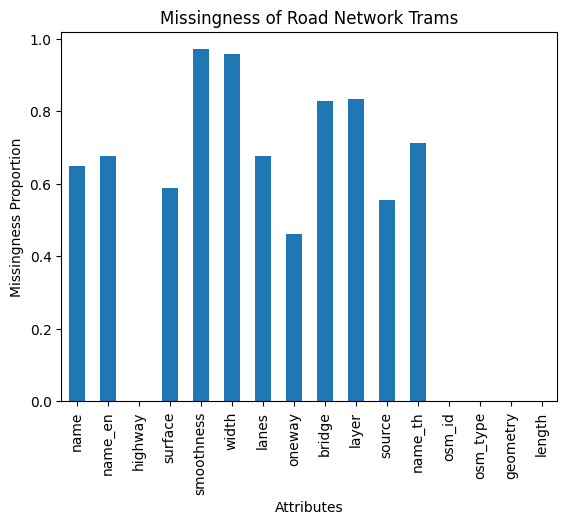

In [ ]:
#plot missingness of road network trams


missingness = road_network_TRAMS.isna().mean()
missingness.plot(kind='bar')
plt.title('Missingness of Road Network Trams')
plt.xlabel('Attributes')
plt.ylabel('Missingness Proportion')
plt.show()


In [60]:
for column in road_network_TRAMS.columns:
    unique_values = road_network_TRAMS[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'name':
[None 'ถนนเพชรเกษม' 'ถนนศุภสารรังสรรค์' ...
 'ถนนเลี่ยงเมือง สายบ้านเมืองจัง' 'ถนนสี่สิงหา' 'ถนนเพชรพัฒนา']

Unique values in column 'name_en':
[None 'Phet Kasem Road' 'Thanon Suphasanrangsan' ...
 'Ban Muang Chang Bypass Road' 'Si Singha Road' 'Phet Phatthana Road']

Unique values in column 'highway':
['secondary_link' 'tertiary' 'secondary' 'trunk' 'tertiary_link' 'primary'
 'primary_link' 'trunk_link']

Unique values in column 'surface':
[None 'asphalt' 'concrete' 'paved' 'unpaved' 'gravel' 'dirt' 'compacted'
 'wood' 'cobblestone' 'chipseal' 'concrete:plates' 'ground'
 'asphalt;concrete' 'paving_stones' 'bricks']

Unique values in column 'smoothness':
[None 'excellent' 'good' 'bad' 'intermediate' 'very_bad' 'horrible'
 'rough' 'poor']

Unique values in column 'width':
[None '7' '8' '6' '16' '9' '3' '5' '14' '12' '10' '4' '18' '4.5' '17' '20'
 '2' '5.5' '2.5' '3.5' '11' '30' '11.5' '13']

Unique values in column 'lanes':
[None '3' '2' '4' '1' '5' '6' '

# Thailand: Road Surface Data
https://data.humdata.org/dataset/thailand-road-surface-data

In [63]:
roadsurface_data = gpd.read_file('roadnetwork/heigit_tha_roadsurface_lines.gpkg')
roadsurface_data.head()

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: Non-conformant content for record 1 in column osm_changeset_timestamp, 2013-11-08T14:32:08.000+01:00, successfully parsed
  return ogr_read(


continent country_iso_a2 country_iso_a3  urban urban_area       osm_id  \
0      asia             TH        ['THA']    NaN       None  245188757.0   
1      asia             TH        ['THA']    NaN       None  245166783.0   
2      asia             TH        ['THA']    NaN       None  245169605.0   
3      asia             TH        ['THA']    NaN       None  245165484.0   
4      asia             TH        ['THA']    NaN       None  249612168.0   

    osm_type      highway surface smoothness  ...  name name:en  width lanes  \
0  ways_line  residential    None       None  ...  None    None   None  None   
1  ways_line  residential    None       None  ...  None    None   None  None   
2  ways_line  residential    None       None  ...  None    None   None  None   
3  ways_line        track    None       None  ...  None    None   None  None   
4  ways_line  residential    None       None  ...  None    None   None  None   

  oneway bridge layer  source  name:th  \
0   None   None  None    None     None   
1   None   None  None    None     None   
2   None   None  None    None     None   
3   None   None  None    None     None   
4   None   None  None    None     None   

                                            geometry  
0  MULTILINESTRING ((104.12568 17.26296, 104.1276...  
1  MULTILINESTRING ((104.20035 17.30215, 104.2012...  
2  MULTILINESTRING ((104.20257 17.30258, 104.2032...  
3  MULTILINESTRING ((104.19581 17.27292, 104.1924...  
4  MULTILINESTRING ((104.09556 17.18741, 104.0956...  

[5 rows x 30 columns]

In [ ]:
roadsurface_data_TRAMS = roadsurface_data[roadsurface_data['highway'].isin([
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"
])]

In [ ]:
# how many % each
road_network_TRAMS_count = road_network_TRAMS['highway'].value_counts()
highway_percentages = (road_network_TRAMS_count / road_network_TRAMS_count.sum()) * 100

# print
# highway counts
print("Highway Counts:")
print(road_network_TRAMS_count)

# highway percentages
print("\nHighway Percentages:")
print(highway_percentages)


# how many % each
roadsurface_data_TRAMS_count = roadsurface_data_TRAMS['highway'].value_counts()
roadsurface_highway_percentages = (roadsurface_data_TRAMS_count / roadsurface_data_TRAMS_count.sum()) * 100

# print
# highway counts
print("Highway Counts:")
print(roadsurface_data_TRAMS_count)

# highway percentages
print("\nHighway Percentages:")
print(roadsurface_highway_percentages)


Highway Counts:
highway
tertiary          34863
secondary         25995
primary           13926
trunk             13638
trunk_link         9411
primary_link       7135
secondary_link     5648
tertiary_link      1364
Name: count, dtype: int64

Highway Percentages:
highway
tertiary          31.133238
secondary         23.213967
primary           12.436149
trunk             12.178961
trunk_link         8.404179
primary_link       6.371674
secondary_link     5.043758
tertiary_link      1.218075
Name: count, dtype: float64
Highway Counts:
highway
tertiary          41271
secondary         35113
primary           21608
trunk             18234
trunk_link        10976
primary_link       9242
secondary_link     7160
tertiary_link      1940
Name: count, dtype: int64

Highway Percentages:
highway
tertiary          28.356373
secondary         24.125350
primary           14.846369
trunk             12.528170
trunk_link         7.541362
primary_link       6.349970
secondary_link     4.919475
tertiary

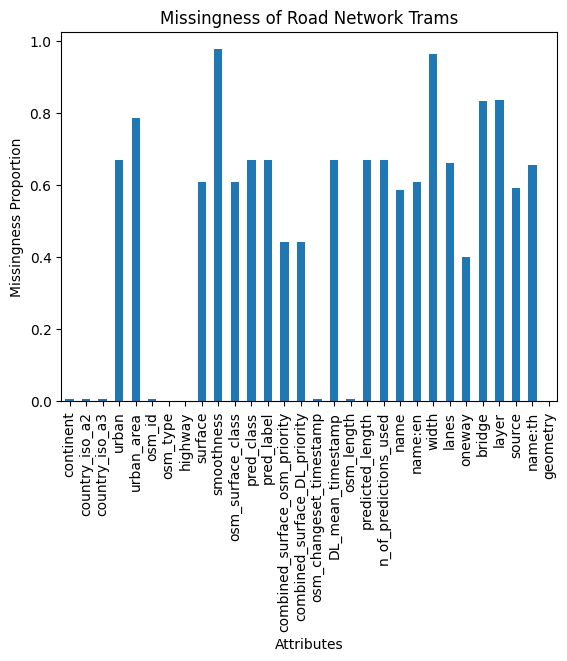

In [93]:
missingness = roadsurface_data_TRAMS.isna().mean()
missingness.plot(kind='bar')
plt.title('Missingness of Road Network Trams')
plt.xlabel('Attributes')
plt.ylabel('Missingness Proportion')
plt.show()


In [92]:
print(roadsurface_data_TRAMS.columns)
print(len(roadsurface_data_TRAMS['osm_id'].unique()))

Index(['continent', 'country_iso_a2', 'country_iso_a3', 'urban', 'urban_area',
       'osm_id', 'osm_type', 'highway', 'surface', 'smoothness',
       'osm_surface_class', 'pred_class', 'pred_label',
       'combined_surface_osm_priority', 'combined_surface_DL_priority',
       'osm_changeset_timestamp', 'DL_mean_timestamp', 'osm_length',
       'predicted_length', 'n_of_predictions_used', 'name', 'name:en', 'width',
       'lanes', 'oneway', 'bridge', 'layer', 'source', 'name:th', 'geometry'],
      dtype='object')
111135


# OSM
/Users/stupong/Desktop/ThaiRAP/osm/thailand-latest-free.shp/gis_osm_roads_free_1.shp

In [126]:
osm = gpd.read_file("roadnetwork/thailand-250902-free.shp/gis_osm_roads_free_1.shp")

In [127]:
osm.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

In [128]:
osm_TRAMS = osm[osm['fclass'].isin([
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"
])]
osm_TRAMS

osm_id  code      fclass                  name   ref oneway  \
10          8654614  5114   secondary           ถนนพิษณุโลก  None      F   
12          8671143  5113     primary         ถนนรัชดาภิเษก  None      F   
14          9017482  5113     primary           ถนนพระราม 9  None      F   
15          9019480  5113     primary        ถนนพระรามที่ 1  None      F   
16          9021016  5114   secondary            ถนนราชดำริ  None      F   
...             ...   ...         ...                   ...   ...    ...   
2849739  1426619277  5114   secondary  ถนนเทพรัตน (ทางขนาน)    34      F   
2849740  1426619278  5112       trunk            ถนนเทพรัตน    34      F   
2849741  1426619279  5132  trunk_link                  None  None      F   
2849742  1426619280  5114   secondary  ถนนเทพรัตน (ทางขนาน)    34      F   
2849743  1426619281  5112       trunk            ถนนเทพรัตน    34      F   

         maxspeed  layer bridge tunnel  \
10             50      0      F      F   
12             60      0      F      F   
14              0      0      F      F   
15             60      0      F      F   
16             60      0      F      F   
...           ...    ...    ...    ...   
2849739         0      0      F      F   
2849740         0      0      F      F   
2849741         0      0      F      F   
2849742         0      0      F      F   
2849743         0      0      F      F   

                                                  geometry  
10       LINESTRING (100.51344 13.76333, 100.51353 13.7...  
12       LINESTRING (100.56134 13.73645, 100.56133 13.7...  
14       LINESTRING (100.58164 13.75484, 100.58235 13.7...  
15       LINESTRING (100.54001 13.74452, 100.53991 13.7...  
16       LINESTRING (100.54107 13.75005, 100.54112 13.7...  
...                                                    ...  
2849739  LINESTRING (100.99803 13.50383, 100.9977 13.50...  
2849740  LINESTRING (100.99837 13.50379, 100.99786 13.5...  
2849741  LINESTRING (101.00565 13.49732, 101.00567 13.4...  
2849742  LINESTRING (101.00565 13.49732, 101.00579 13.4...  
2849743  LINESTRING (101.00567 13.49707, 101.00575 13.4...  

[121400 rows x 11 columns]

In [124]:
osm_TRAMS = osm_TRAMS[osm_TRAMS['ref'].notnull()]
osm_TRAMS

osm_id  code     fclass                       name      ref  \
22         11820660  5113    primary              ถนนงามวงศ์วาน      302   
23         12526576  5112      trunk  ถนนวงแหวนรอบเมืองพิษณุโลก      126   
24         12526578  5115   tertiary                ถนนชายกว๊าน  พย.3029   
25         12526580  5112      trunk            ถนนยันตรกิจโกศล      101   
26         12873887  5114  secondary                ถนนสุวรรณศร     3649   
...             ...   ...        ...                        ...      ...   
2825777  1346185783  5112      trunk                ถนนแจ้งสนิท       23   
2825781  1346186339  5112      trunk                ถนนแจ้งสนิท       23   
2825785  1346187974  5112      trunk                ถนนแจ้งสนิท       23   
2825794  1346189445  5112      trunk                ถนนแจ้งสนิท       23   
2825795  1346189446  5112      trunk                ถนนแจ้งสนิท       23   

        oneway  maxspeed  layer bridge tunnel  \
22           F         0      0      F      F   
23           F         0      0      F      F   
24           B         0      0      F      F   
25           F         0      0      F      F   
26           F         0      0      F      F   
...        ...       ...    ...    ...    ...   
2825777      F         0      0      F      F   
2825781      F         0      0      F      F   
2825785      F         0      0      T      F   
2825794      F         0      0      F      F   
2825795      F         0      0      T      F   

                                                  geometry  
22       LINESTRING (100.54157 13.85659, 100.54138 13.8...  
23       LINESTRING (100.34639 16.84673, 100.34786 16.8...  
24       LINESTRING (99.90409 19.16437, 99.90409 19.164...  
25       LINESTRING (100.74255 18.57213, 100.74262 18.5...  
26       LINESTRING (101.37342 14.13362, 101.37336 14.1...  
...                                                    ...  
2825777  LINESTRING (103.86664 16.0294, 103.86948 16.03...  
2825781  LINESTRING (103.86634 16.02911, 103.86459 16.0...  
2825785  LINESTRING (103.86671 16.02923, 103.86634 16.0...  
2825794  LINESTRING (103.88479 16.03368, 103.88364 16.0...  
2825795  LINESTRING (103.8858 16.03362, 103.88479 16.03...  

[65564 rows x 11 columns]

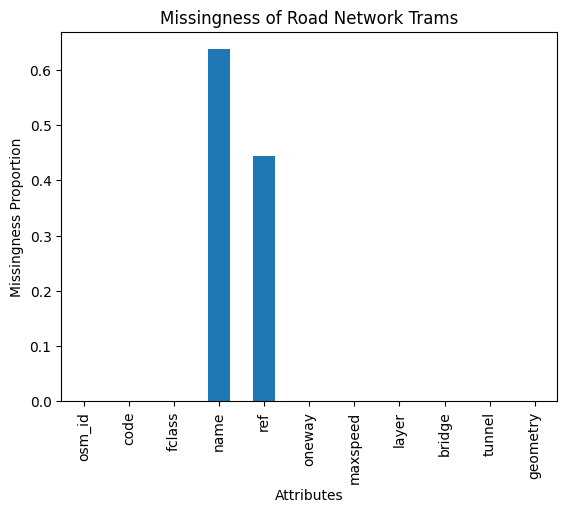

In [129]:
missingness = osm_TRAMS.isna().mean()
missingness.plot(kind='bar')
plt.title('Missingness of Road Network Trams')
plt.xlabel('Attributes')
plt.ylabel('Missingness Proportion')
plt.show()

In [130]:
# unique osm_id
print('osm_TRAMS:', len(osm_TRAMS['osm_id'].unique()))
print('road_network_TRAMS:', len(road_network_TRAMS['osm_id'].unique()))
print('roadsurface_data_TRAMS:', len(roadsurface_data_TRAMS['osm_id'].unique()))

osm_TRAMS: 121400
road_network_TRAMS: 111980
roadsurface_data_TRAMS: 111135


In [113]:
# Ensure dtype consistency for osm_id columns
osm_TRAMS['osm_id'] = osm_TRAMS['osm_id'].astype(str)
road_network_TRAMS['osm_id'] = road_network_TRAMS['osm_id'].astype(str)
roadsurface_data_TRAMS['osm_id'] = roadsurface_data_TRAMS['osm_id'].astype(str)

# Unique osm_id sets
osm_ids_osm_TRAMS = set(osm_TRAMS['osm_id'].unique())
osm_ids_road_network_TRAMS = set(road_network_TRAMS['osm_id'].unique())
osm_ids_roadsurface_data_TRAMS = set(roadsurface_data_TRAMS['osm_id'].unique())

# Compare osm_id between the three sources
common_ids_all = osm_ids_osm_TRAMS & osm_ids_road_network_TRAMS & osm_ids_roadsurface_data_TRAMS
common_ids_osm_road_network = osm_ids_osm_TRAMS & osm_ids_road_network_TRAMS
common_ids_osm_roadsurface = osm_ids_osm_TRAMS & osm_ids_roadsurface_data_TRAMS
common_ids_road_network_roadsurface = osm_ids_road_network_TRAMS & osm_ids_roadsurface_data_TRAMS

# Print results
print(f"Total unique osm_id in osm_TRAMS: {len(osm_ids_osm_TRAMS)}")
print(f"Total unique osm_id in road_network_TRAMS: {len(osm_ids_road_network_TRAMS)}")
print(f"Total unique osm_id in roadsurface_data_TRAMS: {len(osm_ids_roadsurface_data_TRAMS)}\n")

print(f"Common osm_id in all three sources: {len(common_ids_all)}")
print(f"Common osm_id between osm_TRAMS and road_network_TRAMS: {len(common_ids_osm_road_network)}")
print(f"Common osm_id between osm_TRAMS and roadsurface_data_TRAMS: {len(common_ids_osm_roadsurface)}")
print(f"Common osm_id between road_network_TRAMS and roadsurface_data_TRAMS: {len(common_ids_road_network_roadsurface)}")

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Total unique osm_id in osm_TRAMS: 117265
Total unique osm_id in road_network_TRAMS: 111980
Total unique osm_id in roadsurface_data_TRAMS: 111135

Common osm_id in all three sources: 0
Common osm_id between osm_TRAMS and road_network_TRAMS: 108462
Common osm_id between osm_TRAMS and roadsurface_data_TRAMS: 0
Common osm_id between road_network_TRAMS and roadsurface_data_TRAMS: 0


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [115]:
common_ids_road_network_roadsurface

set()

In [111]:
road_network_TRAMS['osm_id'].dtype

dtype('int64')

In [131]:
# we will be using road_network_TRAMS just match osm_id with osm_TRAMS to get the col ref

road_network_TRAMS = road_network_TRAMS.merge(
    osm_TRAMS[['osm_id', 'ref']], on='osm_id', how='left'
)

road_network_TRAMS

name                 name_en         highway   surface  \
0                    None                    None  secondary_link      None   
1                    None                    None        tertiary      None   
2             ถนนเพชรเกษม         Phet Kasem Road       secondary      None   
3       ถนนศุภสารรังสรรค์  Thanon Suphasanrangsan        tertiary      None   
4                    None                    None        tertiary      None   
...                   ...                     ...             ...       ...   
111975      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111976      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111977      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111978        ถนนศรีสะเกษ          Si Sa Ket Road         primary   asphalt   
111979          ถนนศุภกิจ          Supphakit Road       secondary      None   

          smoothness width lanes oneway bridge layer            source  \
0               None  None  None    yes   None  None              None   
1               None  None  None   None   None  None  MapBox Satellite   
2               None  None     3    yes   None  None              None   
3               None  None  None   None   None  None              None   
4               None  None  None   None   None  None  MapBox Satellite   
...              ...   ...   ...    ...    ...   ...               ...   
111975  intermediate    10     4   None   None  None              None   
111976          good  None     2    yes   None  None              None   
111977  intermediate  None     2    yes   None  None              None   
111978          good  None     2    yes   None  None              None   
111979          None  None  None   None   None  None              None   

              name_th      osm_id   osm_type  \
0                None   472283206  ways_line   
1                None   279931743  ways_line   
2                None  1315837496  ways_line   
3                None  1315837497  ways_line   
4                None  1340170665  ways_line   
...               ...         ...        ...   
111975  ถนนสรรพสิทธิ์   731012454  ways_line   
111976  ถนนสรรพสิทธิ์   737773136  ways_line   
111977  ถนนสรรพสิทธิ์   737773142  ways_line   
111978    ถนนศรีสะเกษ   739002686  ways_line   
111979      ถนนศุภกิจ    16242505  relations   

                                                 geometry       length  \
0       LINESTRING (692949.15 1518859.803, 693039.638 ...   302.267819   
1       LINESTRING (1025201.59 1945835.81, 1025170.898...  4967.888534   
2       LINESTRING (662273.876 774830.89, 662266.234 7...    11.085677   
3       LINESTRING (662273.876 774830.89, 662255.953 7...    17.939892   
4       LINESTRING (1022042.972 1942658.098, 1022041.2...  4015.235516   
...                                                   ...          ...   
111975  LINESTRING (1129662.894 1692866.916, 1129680.7...   859.003300   
111976  LINESTRING (1130740.438 1692900.081, 1130726.6...   221.680443   
111977  LINESTRING (1130521.095 1692886.745, 1130531.9...   221.053392   
111978  LINESTRING (1126175.041 1687857.174, 1126149.9...    92.955789   
111979  LINESTRING (725271.022 1514622.162, 725287.692...  1086.229032   

          ref_x    ref_y      ref  
0          None      NaN     None  
1       สน.2017  สน.2017  สน.2017  
2          None      NaN     None  
3          None      NaN     None  
4          None      NaN     None  
...         ...      ...      ...  
111975     None      NaN     None  
111976     None      NaN     None  
111977     None      NaN     None  
111978      226      226      226  
111979      NaN      NaN      NaN  

[111980 rows x 19 columns]

In [132]:
# how many road_network_TRAMS['ref'] isnotnull

road_network_TRAMS['ref_x'].notnull().sum()

60495

In [125]:
#save road_network_TRAMS
road_network_TRAMS.to_file("roadnetwork/road_network_TRAMS.geojson", driver='GeoJSON')

# Road Network
### 1. Highway class filter
Selecting only trunk, primary, secondary, tertiary (and their _link variants) is aligned with OSM tagging conventions and roughly maps to Thailand’s DOH/DRR highway networks.

### 2. Using ref
Requiring a non-null ref ensures you’re working with officially numbered roads (national or rural highways). This is critical — otherwise you’d be including urban arterials, service roads, or tertiary streets that may not be part of the “formal” highway system.

### 3. Spatial clipping with incidents
Buffering historical incident points (10 m) and clipping the road network ensures:


https://data.humdata.org/dataset/hotosm_tha_roads

https://download.geofabrik.de/asia/thailand-250902-free.shp.zip

In [2]:
import geopandas as gpd
import pandas as pd

road_network = gpd.read_file('roadnetwork/hotosm_tha_roads_lines_shp/hotosm_tha_roads_lines_shp.shp') # humdata
osm = gpd.read_file("roadnetwork/thailand-250902-free.shp/gis_osm_roads_free_1.shp") # geofabrik
accidents = gpd.read_file("DOH/motorcycle_accidents_TRAMS.shp") # accidents from TRAMS

In [3]:
# --- pick a metric CRS for Thailand (UTM 47N suits BKK/central; use 48N if far east) ---
TARGET_CRS = "EPSG:32647"
road_network = road_network.to_crs(TARGET_CRS)
osm          = osm.to_crs(TARGET_CRS)
accidents    = accidents.to_crs(TARGET_CRS)

In [4]:
# --- filter highway classes ---
allowed = {
    "trunk","trunk_link",
    "primary","primary_link",
    "secondary","secondary_link",
    "tertiary","tertiary_link"
}
roads_osm  = osm[osm["fclass"].isin(allowed)].copy()
roads_hot  = road_network[road_network["highway"].isin(allowed)].copy()

In [5]:
# --- attach 'ref' from Geofabrik to HOTOSM by osm_id (if available) ---
roads_hot["osm_id"] = roads_hot["osm_id"].astype(str)
roads_osm["osm_id"] = roads_osm["osm_id"].astype(str)

roads_hot = roads_hot.merge(
    roads_osm[["osm_id","ref"]],
    on="osm_id", how="left", validate="m:1"
)

In [6]:
# --- keep only numbered routes (non-null/non-empty ref) ---
roads_hot["ref"] = roads_hot["ref"].astype(str).str.strip()
roads_num = roads_hot.loc[roads_hot["ref"].ne("") & (roads_hot["ref"].str.lower() != "nan")].copy()


In [177]:
# --- build 100 m accident buffer (metric CRS) ---
acc_buf = accidents.copy()
acc_buf["geometry"] = acc_buf.geometry.buffer(100)

# --- intersect: CLIP (cuts lines to inside-buffer pieces) ---
mask = gpd.GeoDataFrame(geometry=[acc_buf.unary_union], crs=acc_buf.crs)
study_network = gpd.clip(roads_num, mask)

/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_12957/4000339713.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gpd.GeoDataFrame(geometry=[acc_buf.unary_union], crs=acc_buf.crs)


: 

: 

In [ ]:
# --- optional sanity checks ---
print("roads_num:", len(roads_num), "study_network:", len(study_network))
print("sample refs:", study_network["ref"].dropna().astype(str).head().tolist())

In [147]:
road_network_TRAMS = road_network[road_network['highway'].isin([
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"
])]

osm_TRAMS = osm[osm['fclass'].isin([
    "trunk", "trunk_link",
    "primary", "primary_link",
    "secondary", "secondary_link",
    "tertiary", "tertiary_link"
])]


In [148]:
# Display the columns and counts for road_network_TRAMS and osm_TRAMS
print("Road Network TRAMS Columns:")
print(road_network_TRAMS.columns)
print("\nRoad Network TRAMS Count:")
print(road_network_TRAMS.count())

print("\nOSM TRAMS Columns:")
print(osm_TRAMS.columns)
print("\nOSM TRAMS Count:")
print(osm_TRAMS.count())

Road Network TRAMS Columns:
Index(['name', 'name_en', 'highway', 'surface', 'smoothness', 'width', 'lanes',
       'oneway', 'bridge', 'layer', 'source', 'name_th', 'osm_id', 'osm_type',
       'geometry'],
      dtype='object')

Road Network TRAMS Count:
name           39226
name_en        36171
highway       111980
surface        46140
smoothness      3338
width           4645
lanes          36270
oneway         60416
bridge         19286
layer          18737
source         49917
name_th        32100
osm_id        111980
osm_type      111980
geometry      111980
dtype: int64

OSM TRAMS Columns:
Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry'],
      dtype='object')

OSM TRAMS Count:
osm_id      121400
code        121400
fclass      121400
name         44128
ref          67522
oneway      121400
maxspeed    121400
layer       121400
bridge      121400
tunnel      121400
geometry    121400
dtype: int64


In [149]:
# Ensure dtype consistency for 'osm_id' columns
road_network_TRAMS['osm_id'] = road_network_TRAMS['osm_id'].astype(str)
osm_TRAMS['osm_id'] = osm_TRAMS['osm_id'].astype(str)

# Merge road_network_TRAMS with osm_TRAMS to get the 'ref' column
road_network_TRAMS = road_network_TRAMS.merge(
    osm_TRAMS[['osm_id', 'ref']], on='osm_id', how='left'
)

road_network_TRAMS

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


name                 name_en         highway   surface  \
0                    None                    None  secondary_link      None   
1                    None                    None        tertiary      None   
2             ถนนเพชรเกษม         Phet Kasem Road       secondary      None   
3       ถนนศุภสารรังสรรค์  Thanon Suphasanrangsan        tertiary      None   
4                    None                    None        tertiary      None   
...                   ...                     ...             ...       ...   
111975      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111976      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111977      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111978        ถนนศรีสะเกษ          Si Sa Ket Road         primary   asphalt   
111979          ถนนศุภกิจ          Supphakit Road       secondary      None   

          smoothness width lanes oneway bridge layer            source  \
0               None  None  None    yes   None  None              None   
1               None  None  None   None   None  None  MapBox Satellite   
2               None  None     3    yes   None  None              None   
3               None  None  None   None   None  None              None   
4               None  None  None   None   None  None  MapBox Satellite   
...              ...   ...   ...    ...    ...   ...               ...   
111975  intermediate    10     4   None   None  None              None   
111976          good  None     2    yes   None  None              None   
111977  intermediate  None     2    yes   None  None              None   
111978          good  None     2    yes   None  None              None   
111979          None  None  None   None   None  None              None   

              name_th      osm_id   osm_type  \
0                None   472283206  ways_line   
1                None   279931743  ways_line   
2                None  1315837496  ways_line   
3                None  1315837497  ways_line   
4                None  1340170665  ways_line   
...               ...         ...        ...   
111975  ถนนสรรพสิทธิ์   731012454  ways_line   
111976  ถนนสรรพสิทธิ์   737773136  ways_line   
111977  ถนนสรรพสิทธิ์   737773142  ways_line   
111978    ถนนศรีสะเกษ   739002686  ways_line   
111979      ถนนศุภกิจ    16242505  relations   

                                                 geometry      ref  
0       LINESTRING (11219269.902 1543548.766, 11219363...     None  
1       LINESTRING (11570921.651 1983461.94, 11570886....  สน.2017  
2       LINESTRING (11184164.511 782022.456, 11184156....     None  
3       LINESTRING (11184164.511 782022.456, 11184146....     None  
4       LINESTRING (11567535.111 1980207.518, 11567533...     None  
...                                                   ...      ...  
111975  LINESTRING (11672353.544 1716374.475, 11672371...     None  
111976  LINESTRING (11673465.581 1716378.733, 11673451...     None  
111977  LINESTRING (11673239.035 1716371.037, 11673250...     None  
111978  LINESTRING (11668618.664 1711273.679, 11668592...      226  
111979  LINESTRING (11252493.082 1538892.798, 11252510...      NaN  

[111980 rows x 16 columns]

In [171]:
mask = gpd.GeoDataFrame(geometry=[accidents_buffer.unary_union], crs=target_crs)
roads_clip = gpd.clip(road_network_TRAMS[road_network_TRAMS['ref'].null()], mask)

/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_12957/2257645313.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gpd.GeoDataFrame(geometry=[accidents_buffer.unary_union], crs=target_crs)


AttributeError: 'Series' object has no attribute 'null'

In [172]:
road_network_TRAMS

name                 name_en         highway   surface  \
0                    None                    None  secondary_link      None   
1                    None                    None        tertiary      None   
2             ถนนเพชรเกษม         Phet Kasem Road       secondary      None   
3       ถนนศุภสารรังสรรค์  Thanon Suphasanrangsan        tertiary      None   
4                    None                    None        tertiary      None   
...                   ...                     ...             ...       ...   
111975      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111976      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111977      ถนนสรรพสิทธิ์       Sarnbasiddhi Road       secondary  concrete   
111978        ถนนศรีสะเกษ          Si Sa Ket Road         primary   asphalt   
111979          ถนนศุภกิจ          Supphakit Road       secondary      None   

          smoothness width lanes oneway bridge layer            source  \
0               None  None  None    yes   None  None              None   
1               None  None  None   None   None  None  MapBox Satellite   
2               None  None     3    yes   None  None              None   
3               None  None  None   None   None  None              None   
4               None  None  None   None   None  None  MapBox Satellite   
...              ...   ...   ...    ...    ...   ...               ...   
111975  intermediate    10     4   None   None  None              None   
111976          good  None     2    yes   None  None              None   
111977  intermediate  None     2    yes   None  None              None   
111978          good  None     2    yes   None  None              None   
111979          None  None  None   None   None  None              None   

              name_th      osm_id   osm_type  \
0                None   472283206  ways_line   
1                None   279931743  ways_line   
2                None  1315837496  ways_line   
3                None  1315837497  ways_line   
4                None  1340170665  ways_line   
...               ...         ...        ...   
111975  ถนนสรรพสิทธิ์   731012454  ways_line   
111976  ถนนสรรพสิทธิ์   737773136  ways_line   
111977  ถนนสรรพสิทธิ์   737773142  ways_line   
111978    ถนนศรีสะเกษ   739002686  ways_line   
111979      ถนนศุภกิจ    16242505  relations   

                                                 geometry      ref  
0       LINESTRING (11219269.902 1543548.766, 11219363...     None  
1       LINESTRING (11570921.651 1983461.94, 11570886....  สน.2017  
2       LINESTRING (11184164.511 782022.456, 11184156....     None  
3       LINESTRING (11184164.511 782022.456, 11184146....     None  
4       LINESTRING (11567535.111 1980207.518, 11567533...     None  
...                                                   ...      ...  
111975  LINESTRING (11672353.544 1716374.475, 11672371...     None  
111976  LINESTRING (11673465.581 1716378.733, 11673451...     None  
111977  LINESTRING (11673239.035 1716371.037, 11673250...     None  
111978  LINESTRING (11668618.664 1711273.679, 11668592...      226  
111979  LINESTRING (11252493.082 1538892.798, 11252510...      NaN  

[111980 rows x 16 columns]

In [ ]:
mask = gpd.GeoDataFrame(geometry=[accidents_buffer.unary_union], crs=target_crs)
roads_clip = gpd.clip(roads_num, mask)

62068

In [7]:
import geopandas as gpd
import pandas as pd

# --------------------------
# Config
# --------------------------
# Use UTM 47N for Bangkok/central/west Thailand; switch to "EPSG:32648" for far east.
TARGET_CRS = "EPSG:32647"
BUF_M = 100

ALLOWED = {
    "trunk","trunk_link",
    "primary","primary_link",
    "secondary","secondary_link",
    "tertiary","tertiary_link"
}

# --------------------------
# 0) Read data
# --------------------------
road_network = gpd.read_file("roadnetwork/hotosm_tha_roads_lines_shp/hotosm_tha_roads_lines_shp.shp")  # HOTOSM
osm          = gpd.read_file("roadnetwork/thailand-250902-free.shp/gis_osm_roads_free_1.shp")          # Geofabrik
accidents    = gpd.read_file("DOH/motorcycle_accidents_TRAMS.shp")                                     # TRAMS

# --------------------------
# 1) Reproject to metric CRS
# --------------------------
road_network = road_network.to_crs(TARGET_CRS)
osm          = osm.to_crs(TARGET_CRS)
accidents    = accidents.to_crs(TARGET_CRS)

# --------------------------
# 2) Filter highway classes
# --------------------------
# HOTOSM typically uses 'highway'
if "highway" not in road_network.columns:
    raise KeyError("Expected 'highway' column in HOTOSM roads.")

roads_hot = road_network[road_network["highway"].isin(ALLOWED)].copy()

# Geofabrik uses 'fclass' for functional class; fall back to 'highway' if needed.
osm_class_col = "fclass" if "fclass" in osm.columns else ("highway" if "highway" in osm.columns else None)
if osm_class_col is None:
    raise KeyError("Expected 'fclass' or 'highway' column in Geofabrik roads.")

roads_osm = osm[osm[osm_class_col].isin(ALLOWED)].copy()

# --------------------------
# 3) Attach 'ref' to HOTOSM roads
#    Prefer fast key merge via 'osm_id'; if not possible, use nearest spatial join
# --------------------------
if "osm_id" in roads_hot.columns and "osm_id" in roads_osm.columns:
    # Ensure dtype consistency
    roads_hot["osm_id"] = roads_hot["osm_id"].astype(str)
    roads_osm["osm_id"] = roads_osm["osm_id"].astype(str)
    # Merge (many HOTOSM features may not match Geofabrik 1:1; that's okay)
    roads_hot = roads_hot.merge(
        roads_osm[["osm_id", "ref"]].copy(),
        on="osm_id", how="left", validate="m:1"
    )
else:
    # Fallback: nearest join within small tolerance to bring 'ref' across
    # Keep only ref + geometry on the right to avoid column collisions.
    right = roads_osm[["ref", "geometry"]].copy()
    roads_hot = gpd.sjoin_nearest(
        roads_hot, right,
        how="left",
        max_distance=20,   # meters; adjust if necessary
        distance_col="join_dist"
    ).drop(columns=[c for c in ["index_right"] if c in roads_hot.columns])

# --------------------------
# 4) Filter to numbered routes (non-null, non-empty ref)
# --------------------------
roads_hot["ref"] = roads_hot["ref"].astype(str).str.strip()
roads_num = roads_hot.loc[
    roads_hot["ref"].ne("") & (roads_hot["ref"].str.lower() != "nan")
].copy()

# --------------------------
# 5) Build 100 m accident buffers
# --------------------------
acc_buf = accidents.copy()
acc_buf["geometry"] = acc_buf.geometry.buffer(BUF_M)

# Single unioned mask polygon (Shapely 2 preferred API)
try:
    mask_geom = acc_buf.union_all()         # GeoPandas >=0.14 / Shapely 2
except AttributeError:
    mask_geom = acc_buf.unary_union         # fallback for older versions

# --------------------------
# 6A) CLIP to buffers (cuts lines)
# --------------------------
study_clip = gpd.clip(roads_num, mask_geom)

# --------------------------
# 6B) SELECT whole segments intersecting buffers (keeps full geometry)
# --------------------------
sel_idx = gpd.sjoin(
    roads_num[["geometry"]],
    acc_buf[["geometry"]],
    predicate="intersects", how="inner"
).index.unique()
study_select = roads_num.loc[sel_idx].copy()

# --------------------------
# 7) Quick sanity checks
# --------------------------
print(f"Total HOTOSM highways (allowed classes): {len(roads_hot)}")
print(f"Numbered routes after ref filter:        {len(roads_num)}")
print(f"Clipped segments within {BUF_M} m:        {len(study_clip)}")
print(f"Whole segments intersecting {BUF_M} m:    {len(study_select)}")
print("Sample refs:", study_select["ref"].head(5).tolist())

# --------------------------
# 8) (Optional) Export
# --------------------------
# study_clip.to_file("out/study_network_clip_100m.shp")
# study_select.to_file("out/study_network_select_100m.shp")


Total HOTOSM highways (allowed classes): 111980
Numbered routes after ref filter:        111864
Clipped segments within 100 m:        25897
Whole segments intersecting 100 m:    25897
Sample refs: ['331', '4304', '4304', '4030', 'None']


In [12]:
import geopandas as gpd
import pandas as pd

# --------------------------
# Config
# --------------------------
TARGET_CRS = "EPSG:32647"   # use 32648 for far east Thailand if needed
BUF_ADD_M  = 500            # for adding ref-null roads near accidents
ALLOWED = {
    "trunk","trunk_link",
    "primary","primary_link",
    "secondary","secondary_link",
    "tertiary","tertiary_link"
}

# --------------------------
# 0) Read data
# --------------------------
road_network = gpd.read_file("roadnetwork/hotosm_tha_roads_lines_shp/hotosm_tha_roads_lines_shp.shp")  # HOTOSM
osm          = gpd.read_file("roadnetwork/thailand-250902-free.shp/gis_osm_roads_free_1.shp")          # Geofabrik
accidents    = gpd.read_file("DOH/motorcycle_accidents_TRAMS.shp")                                     # TRAMS

# --------------------------
# 1) Reproject to metric CRS
# --------------------------
road_network = road_network.to_crs(TARGET_CRS)
osm          = osm.to_crs(TARGET_CRS)
accidents    = accidents.to_crs(TARGET_CRS)

# --------------------------
# 2) Filter highway classes
# --------------------------
if "highway" not in road_network.columns:
    raise KeyError("Expected 'highway' column in HOTOSM roads.")
roads_hot = road_network[road_network["highway"].isin(ALLOWED)].copy()

osm_class_col = "fclass" if "fclass" in osm.columns else ("highway" if "highway" in osm.columns else None)
if osm_class_col is None:
    raise KeyError("Expected 'fclass' or 'highway' column in Geofabrik roads.")
roads_osm = osm[osm[osm_class_col].isin(ALLOWED)].copy()

# --------------------------
# 3) Attach 'ref' to HOTOSM roads (prefer merge on osm_id; fallback to nearest)
# --------------------------
if "osm_id" in roads_hot.columns and "osm_id" in roads_osm.columns:
    roads_hot["osm_id"] = roads_hot["osm_id"].astype(str)
    roads_osm["osm_id"] = roads_osm["osm_id"].astype(str)
    roads_hot = roads_hot.merge(
        roads_osm[["osm_id","ref"]].copy(),
        on="osm_id", how="left", validate="m:1"
    )
else:
    right = roads_osm[["ref","geometry"]].copy()
    roads_hot = gpd.sjoin_nearest(
        roads_hot, right,
        how="left",
        max_distance=20,     # meters; raise if needed
        distance_col="join_dist"
    ).drop(columns=[c for c in ["index_right"] if c in roads_hot.columns])

# --------------------------
# 4) Split by ref presence
# --------------------------
ref_valid_mask = roads_hot["ref"].notna() & (roads_hot["ref"].astype(str).str.strip() != "")
roads_num      = roads_hot.loc[ref_valid_mask].copy()      # keep ALL of these
roads_ref_null = roads_hot.loc[~ref_valid_mask].copy()     # consider adding near accidents only

# --------------------------
# 5) Build 500 m buffers around accidents
# --------------------------
acc_buf500 = accidents.copy()
acc_buf500["geometry"] = acc_buf500.geometry.buffer(BUF_ADD_M)

# --------------------------
# 6) Add only ref-null roads within 500 m of accidents (keep whole segments)
# --------------------------
near_idx = gpd.sjoin(
    roads_ref_null[["geometry"]],
    acc_buf500[["geometry"]],
    predicate="intersects", how="inner"
).index.unique()
roads_ref_null_near = roads_ref_null.loc[near_idx].copy()

# --------------------------
# 7) Combine: (ALL ref-present) ∪ (ref-null within 500 m)
# --------------------------
study_select = pd.concat([roads_num, roads_ref_null_near], ignore_index=True)

# De-duplicate
if "osm_id" in study_select.columns:
    study_select["osm_id"] = study_select["osm_id"].astype(str)
    study_select = study_select.drop_duplicates(subset="osm_id")
else:
    # fallback dedupe by geometry
    study_select["__wkb__"] = study_select.geometry.apply(lambda g: g.wkb)
    study_select = study_select.drop_duplicates(subset="__wkb__").drop(columns="__wkb__")

# --------------------------
# 8) Sanity checks
# --------------------------
print(f"Kept ALL numbered routes (ref present): {len(roads_num)}")
print(f"Added ref-null roads within {BUF_ADD_M} m: {len(roads_ref_null_near)}")
print(f"Final study network (unique): {len(study_select)}")
print("Sample refs:", study_select["ref"].dropna().astype(str).head(5).tolist())

# --------------------------
# 9) (Optional) Export
# --------------------------
# study_select.to_file("out/study_network_all_ref_plus_null_500m.shp")


Kept ALL numbered routes (ref present): 62068
Added ref-null roads within 500 m: 16484
Final study network (unique): 78552
Sample refs: ['สน.2017', '331', '4304', '4277', '4']


# Use below for road network

In [74]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# provinces = Path("/Users/stupong/Library/CloudStorage/OneDrive-SharedLibraries-UniversityCollegeLondon(2)/SpaceTimeLab - Natchapon PhD - Natchapon PhD/Upgrading/PhD/traffic_incident_analysis/data/boundary/TH_Province.shp")
provinces = gpd.read_file("/Users/stupong/Library/CloudStorage/OneDrive-SharedLibraries-UniversityCollegeLondon(2)/SpaceTimeLab - Natchapon PhD - Natchapon PhD/Upgrading/PhD/traffic_incident_analysis/data/boundary/TH_Province.shp")

# check the CRS
provinces.crs

<Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°E and 102°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Myanmar (Burma). Russian Federation. Thailand.
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
import geopandas as gpd
import pandas as pd
import re

# --------------------------
# Config
# --------------------------
TARGET_CRS      = "EPSG:32647"   # use 32648 if your AOI is far-east Thailand
BUF_ADD_M       = 500            # add ref-null roads within this distance of accidents
BUF_ANALYSIS_M  = 100            # clip analysis geometry to this distance

ALLOWED = {
    "trunk","trunk_link",
    "primary","primary_link",
    "secondary","secondary_link",
    "tertiary","tertiary_link"
}

# Regex: numeric refs (DOH) and Thai-letter refs (DRR)
RE_NUMERIC = re.compile(r"^\s*\d{1,4}\s*$")
RE_THAI_DRR = re.compile(r"^\s*[ก-๙]{1,3}\.?\d{2,5}\s*$")

def normalize_ref(r):
    """Return a single clean ref token (numeric or Thai-DRR) from multi-valued refs."""
    if r is None: 
        return None
    tokens = re.split(r"[;,/|]\s*", str(r))
    for t in tokens:
        t = t.strip()
        if RE_THAI_DRR.fullmatch(t) or RE_NUMERIC.fullmatch(t):
            return t
    return tokens[0].strip() if tokens and tokens[0].strip() else None

def owner_from_ref(r):
    if r is None: return "unknown"
    if RE_NUMERIC.fullmatch(r): return "DOH"   # national highways
    if RE_THAI_DRR.fullmatch(r): return "DRR"  # rural/provincial roads
    return "unknown"

# --------------------------
# 0) Read (Geofabrik roads + TRAMS accidents)
# --------------------------
osm = gpd.read_file("roadnetwork/thailand-250902-free.shp/gis_osm_roads_free_1.shp")
acc = gpd.read_file("DOH/motorcycle_accidents_TRAMS.shp")

# --------------------------
# 1) Reproject to metric CRS
# --------------------------
osm = osm.to_crs(TARGET_CRS)
acc = acc.to_crs(TARGET_CRS)

# --------------------------
# 2) Filter highway classes
# --------------------------
cls_col = "fclass" if "fclass" in osm.columns else ("highway" if "highway" in osm.columns else None)
if cls_col is None:
    raise KeyError("Expected 'fclass' or 'highway' in Geofabrik roads.")
roads = osm[osm[cls_col].isin(ALLOWED)].copy()

# --------------------------
# 3) Clean ref + owner label
# --------------------------
roads["ref"] = roads["ref"].apply(normalize_ref)
roads["is_numbered"] = roads["ref"].notna()
roads["owner"] = roads["ref"].apply(owner_from_ref)

# --------------------------
# 4) Split by ref presence
# --------------------------
roads_num      = roads.loc[roads["is_numbered"]].copy()   # keep ALL of these
roads_ref_null = roads.loc[~roads["is_numbered"]].copy()  # add near accidents only

# --------------------------
# 5) Build buffers
# --------------------------
acc_buf500 = acc.copy();  acc_buf500["geometry"] = acc_buf500.geometry.buffer(BUF_ADD_M)
acc_buf100 = acc.copy();  acc_buf100["geometry"] = acc_buf100.geometry.buffer(BUF_ANALYSIS_M)

# --------------------------
# 6) Add ref-null roads within 500 m (keep whole segments)
# --------------------------
near_idx = gpd.sjoin(
    roads_ref_null[["geometry"]],
    acc_buf500[["geometry"]],
    predicate="intersects",
    how="inner"
).index.unique()
roads_ref_null_near = roads_ref_null.loc[near_idx].copy()
roads_ref_null_near["selected_by_distance"] = True

# --------------------------
# 7) Combine coverage = (all numbered) ∪ (ref-null within 500 m)
# --------------------------
coverage = pd.concat([roads_num, roads_ref_null_near], ignore_index=True)

# Deduplicate
if "osm_id" in coverage.columns:
    coverage["osm_id"] = coverage["osm_id"].astype(str)
    coverage = coverage.drop_duplicates(subset="osm_id")
else:
    coverage["__wkb__"] = coverage.geometry.apply(lambda g: g.wkb)
    coverage = coverage.drop_duplicates(subset="__wkb__").drop(columns="__wkb__")

coverage["length_m"] = coverage.geometry.length
coverage["selected_by_distance"] = coverage.get("selected_by_distance", False)

# --------------------------
# 8) Analysis layer: clip coverage to 100 m buffers
# --------------------------
try:
    mask100 = acc_buf100.union_all()   # GeoPandas >=0.14 / Shapely 2
except AttributeError:
    mask100 = acc_buf100.unary_union

analysis_clip = gpd.clip(coverage, mask100)
analysis_clip["length_m"] = analysis_clip.geometry.length
analysis_clip["in_100m"] = True

# --------------------------
# 9) Checks
# --------------------------
print(f"ALL numbered routes kept: {len(roads_num)}")
print(f"Added ref-null within {BUF_ADD_M} m: {len(roads_ref_null_near)}")
print(f"Coverage layer (unique): {len(coverage)}")
print(f"Analysis clip (≤{BUF_ANALYSIS_M} m): {len(analysis_clip)}")
print("Owner breakdown (coverage):")
print(coverage["owner"].value_counts(dropna=False))

# --------------------------
# 10) Optional export
# --------------------------
# coverage.to_file("out/tha_highway_coverage.gpkg", layer="coverage", driver="GPKG")
# analysis_clip.to_file("out/tha_highway_analysis_100m.gpkg", layer="analysis_100m", driver="GPKG")


ALL numbered routes kept: 67522
Added ref-null within 500 m: 17810
Coverage layer (unique): 85332
Analysis clip (≤100 m): 28518
Owner breakdown (coverage):
owner
DOH        44573
DRR        21753
unknown    19006
Name: count, dtype: int64


In [61]:
coverage

osm_id  code          fclass                       name      ref  \
0        11820660  5133    primary_link              ถนนงามวงศ์วาน      302   
1        12526576  5112           trunk  ถนนวงแหวนรอบเมืองพิษณุโลก      126   
2        12526578  5115        tertiary                ถนนชายกว๊าน  พย.3029   
3        12526580  5112           trunk            ถนนยันตรกิจโกศล      101   
4        12873887  5114       secondary                ถนนสุวรรณศร     3649   
...           ...   ...             ...                        ...      ...   
85327  1425712075  5134  secondary_link                       None     None   
85328  1425882188  5115        tertiary            ถนนบางเชือกหนัง     None   
85329  1426145338  5113         primary                       None     None   
85330  1426550178  5114       secondary                       None     None   
85331  1426619273  5134  secondary_link                       None     None   

      oneway  maxspeed  layer bridge tunnel  is_numbered    owner  \
0          F         0      0      F      F         True      DOH   
1          F         0      0      F      F         True      DOH   
2          B         0      0      F      F         True      DRR   
3          F         0      0      F      F         True      DOH   
4          F         0      0      F      F         True      DOH   
...      ...       ...    ...    ...    ...          ...      ...   
85327      B         0      0      F      F        False  unknown   
85328      F         0      0      F      F        False  unknown   
85329      B         0      0      F      F        False  unknown   
85330      B         0      0      F      F        False  unknown   
85331      F         0      0      F      F        False  unknown   

      selected_by_distance     length_m  \
0                     None    60.136784   
1                     None  2509.786548   
2                     None  1722.075966   
3                     None  2156.977272   
4                     None    84.303310   
...                    ...          ...   
85327                 True     7.646983   
85328                 True    42.680967   
85329                 True    15.340613   
85330                 True    13.479175   
85331                 True    12.437502   

                                                geometry  
0      LINESTRING (666596.017 1532403.247, 666575.607...  
1      LINESTRING (643441.167 1863088.649, 643597.616...  
2      LINESTRING (595064.257 2119261.377, 595064.843...  
3      LINESTRING (683889.837 2054376.106, 683895.351...  
4      LINESTRING (756223.56 1563800.554, 756217.019 ...  
...                                                  ...  
85327  LINESTRING (733059.942 1436330.515, 733063.499...  
85328  LINESTRING (652476.953 1520974.059, 652466.39 ...  
85329  LINESTRING (886724.138 1782450.401, 886726.734...  
85330  LINESTRING (423672.2 895546.261, 423685.054 89...  
85331  LINESTRING (715122.786 1494758.09, 715130.273 ...  

[85332 rows x 15 columns]

In [65]:
coverage = gpd.read_file("roadnetwork/tha_highway_coverage.gpkg", layer="coverage", driver="GPKG")

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [66]:
coverage

osm_id  code          fclass                       name      ref  \
0        11820660  5133    primary_link              ถนนงามวงศ์วาน      302   
1        12526576  5112           trunk  ถนนวงแหวนรอบเมืองพิษณุโลก      126   
2        12526578  5115        tertiary                ถนนชายกว๊าน  พย.3029   
3        12526580  5112           trunk            ถนนยันตรกิจโกศล      101   
4        12873887  5114       secondary                ถนนสุวรรณศร     3649   
...           ...   ...             ...                        ...      ...   
85327  1425712075  5134  secondary_link                       None     None   
85328  1425882188  5115        tertiary            ถนนบางเชือกหนัง     None   
85329  1426145338  5113         primary                       None     None   
85330  1426550178  5114       secondary                       None     None   
85331  1426619273  5134  secondary_link                       None     None   

      oneway  maxspeed  layer bridge tunnel  is_numbered    owner  \
0          F         0      0      F      F         True      DOH   
1          F         0      0      F      F         True      DOH   
2          B         0      0      F      F         True      DRR   
3          F         0      0      F      F         True      DOH   
4          F         0      0      F      F         True      DOH   
...      ...       ...    ...    ...    ...          ...      ...   
85327      B         0      0      F      F        False  unknown   
85328      F         0      0      F      F        False  unknown   
85329      B         0      0      F      F        False  unknown   
85330      B         0      0      F      F        False  unknown   
85331      F         0      0      F      F        False  unknown   

      selected_by_distance     length_m  \
0                     None    60.136784   
1                     None  2509.786548   
2                     None  1722.075966   
3                     None  2156.977272   
4                     None    84.303310   
...                    ...          ...   
85327                 True     7.646983   
85328                 True    42.680967   
85329                 True    15.340613   
85330                 True    13.479175   
85331                 True    12.437502   

                                                geometry  
0      LINESTRING (666596.017 1532403.247, 666575.607...  
1      LINESTRING (643441.167 1863088.649, 643597.616...  
2      LINESTRING (595064.257 2119261.377, 595064.843...  
3      LINESTRING (683889.837 2054376.106, 683895.351...  
4      LINESTRING (756223.56 1563800.554, 756217.019 ...  
...                                                  ...  
85327  LINESTRING (733059.942 1436330.515, 733063.499...  
85328  LINESTRING (652476.953 1520974.059, 652466.39 ...  
85329  LINESTRING (886724.138 1782450.401, 886726.734...  
85330  LINESTRING (423672.2 895546.261, 423685.054 89...  
85331  LINESTRING (715122.786 1494758.09, 715130.273 ...  

[85332 rows x 15 columns]

In [64]:
# clip coverage using provinces
coverage = gpd.clip(coverage, provinces)

NameError: name 'provinces' is not defined

In [80]:
coverage.to_file("roadnetwork/tha_highway_coverage_clip.gpkg", layer="coverage", driver="GPKG")
# analysis_clip.to_file("roadnetwork/tha_highway_analysis_100m.gpkg", layer="analysis_100m", driver="GPKG")


In [105]:
#print all unique ref
add_ref = coverage['ref'].unique()
print(add_ref)

['4183' '406' '4111' ... 'ชร.1042' 'ชร.5054' 'ชร.5055']


In [106]:
# Clean up the references: strip spaces
refs = pd.Series(add_ref).astype(str).str.strip()

# Identify patterns
non_numeric = refs[~refs.str.replace(" ", "").str.isnumeric()]
with_spaces = refs[refs.str.contains(" ")]
short_codes = refs[refs.str.len() < 3]
long_codes = refs[refs.str.len() > 6]

# Summarize odd cases
odd_summary = {
    "total_refs": len(refs),
    "non_numeric": non_numeric.tolist()[:20],  # show sample
    "with_spaces": with_spaces.tolist()[:20],
    "short_codes": short_codes.tolist()[:20],
    "long_codes": long_codes.tolist()[:20]
}

odd_summary


{'total_refs': 6736,
 'non_numeric': ['สต.2001',
  'สต.3141',
  'สต.3016',
  'สต.3124',
  'สต.4034',
  'สต.2004',
  'สต.3008',
  'สต.3065',
  'None',
  'สต.3019',
  'สต.3015',
  'สต.3005',
  'สต.ถ1-0074',
  'สต.ถ1-0073',
  'พท.2003',
  'พท.1029',
  'สข.ถ1-0060',
  'พท.4046',
  'พท.5022',
  'พท.4004'],
 'with_spaces': ['สต. 3012',
  'สต. 4004',
  'สข. 2031',
  'ปข. 4008',
  'สค. 4001',
  'ฉช.ถ 1-0002',
  'จบ.ถ 19-031',
  'จบ.ถ 19-015',
  'จบ.ถ 1-0006',
  'จบ.ถ 3-0002',
  'ชบ. 3027',
  'นย.ถ 1-0010',
  'สต. 4020',
  'สต. 5030',
  'สต. 3044',
  'สต. 3007',
  'สต. 5044',
  'สต. 4010',
  'สต. 3014',
  'ตง. 4006'],
 'short_codes': ['4',
  '41',
  '35',
  '43',
  '42',
  '3',
  '7',
  '34',
  '9',
  '31',
  '77',
  '36',
  '57',
  '58',
  '59',
  '5',
  '33',
  '48',
  '1',
  '24'],
 'long_codes': ['สต.2001',
  'สต.3141',
  'สต.3016',
  'สต.3124',
  'สต.4034',
  'สต.2004',
  'สต.3008',
  'สต.3065',
  'สต.3019',
  'สต.3015',
  'สต.3005',
  'สต.ถ1-0074',
  'สต.ถ1-0073',
  'พท.2003',
  'พท.1029'

In [104]:
non_numeric

5       สต.2001
6       สต.3141
7       สต.3016
8       สต.3124
9       สต.4034
         ...   
6731    ชร.1009
6732    ชร.1038
6733    ชร.1042
6734    ชร.5054
6735    ชร.5055
Length: 5109, dtype: object

In [87]:
# update length
coverage['length_m'] = coverage.geometry.length

In [88]:
# Group by highway class and sum the lengths
highway_distances = coverage.groupby('fclass')['length_m'].sum()

# Convert to kilometers for better readability
highway_distances_km = highway_distances / 1000

# Print the distances
print("Highway Distances (in km):")
print(highway_distances_km)


# % by km
highway_distances_km_percent = (highway_distances_km / highway_distances_km.sum()) * 100
print("\nHighway Distances Percentages (by km):")
print(highway_distances_km_percent)


Highway Distances (in km):
fclass
primary           15281.219320
primary_link        355.764236
secondary         38033.445207
secondary_link      321.281531
tertiary          59119.961531
tertiary_link        39.402735
trunk             19831.661395
trunk_link          774.435774
Name: length_m, dtype: float64

Highway Distances Percentages (by km):
fclass
primary           11.424598
primary_link       0.265978
secondary         28.434696
secondary_link     0.240198
tertiary          44.199470
tertiary_link      0.029458
trunk             14.826615
trunk_link         0.578986
Name: length_m, dtype: float64


In [89]:
# average, min, max distance of each road segment by type
by_type = coverage.groupby('fclass')['length_m'].agg(['mean', 'min', 'max'])

print("Average length of each road segment (in km):", by_type['mean'] / 1000)
print("Minimum length of each road segment (in m):", by_type['min'])
print("Maximum length of each road segment (in km):", by_type['max'] / 1000)


Average length of each road segment (in km): fclass
primary           1.246938
primary_link      0.102172
secondary         1.668866
secondary_link    0.116872
tertiary          2.554771
tertiary_link     0.091848
trunk             1.340158
trunk_link        0.139112
Name: mean, dtype: float64
Minimum length of each road segment (in m): fclass
primary           1.072601
primary_link      3.374797
secondary         0.549218
secondary_link    3.826054
tertiary          0.544415
tertiary_link     4.586719
trunk             1.342215
trunk_link        1.589248
Name: min, dtype: float64
Maximum length of each road segment (in km): fclass
primary           59.746290
primary_link       1.516542
secondary         78.764529
secondary_link     2.035600
tertiary          76.352745
tertiary_link      5.990499
trunk             63.998843
trunk_link         4.517797
Name: max, dtype: float64


In [90]:
# sum of distances when ref is not null
sum_distances_notnull = coverage[coverage["ref"].notnull()]["length_m"].sum()/1000
print(sum_distances_notnull)
sum_distances = coverage["length_m"].sum()/1000
print(sum_distances)

126940.18243415274
133757.17172764227


In [91]:
# coverage['fclass'] how many rows unique each?
print("Number of unique road classes:", coverage['fclass'].nunique())
print("Number of rows for each road class:")
print(coverage['fclass'].value_counts())

Number of unique road classes: 8
Number of rows for each road class:
fclass
tertiary          23141
secondary         22790
trunk             14798
primary           12255
trunk_link         5567
primary_link       3482
secondary_link     2749
tertiary_link       429
Name: count, dtype: int64


/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_74749/2601697234.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Highway', loc='lower right')


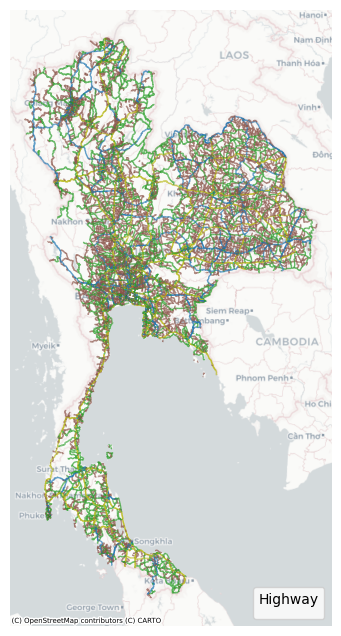

In [92]:
# plot TRAMS on the map using basemap
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
coverage.to_crs(epsg=3857).plot(
    ax=ax, column='fclass', legend=True, linewidth=1, alpha=0.7, cmap='tab10'
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)
ax.set_axis_off()
ax.legend(title='Highway', loc='lower right')


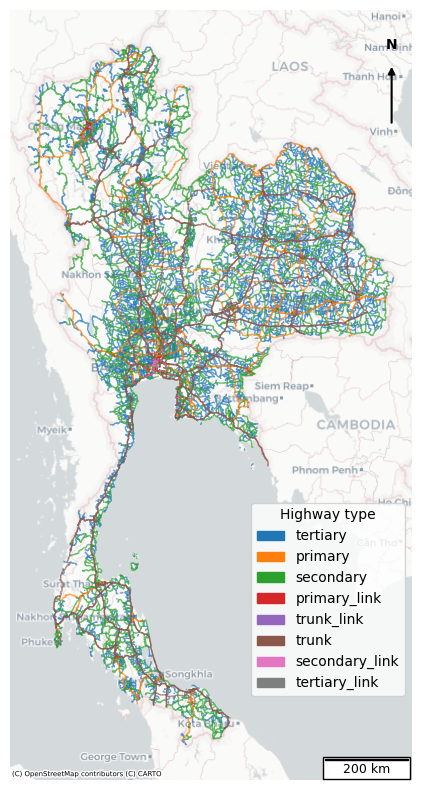

In [93]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.font_manager import FontProperties

# ---------- helpers ----------
def _nice_length_m(data_width_m):
    """Pick a nice scalebar length (1/2/5 × 10^n) ~ 1/5 of axis width."""
    target = data_width_m / 5.0
    import math
    exp = int(math.floor(math.log10(target))) if target > 0 else 0
    base = target / (10 ** exp)
    for b in (1, 2, 5, 10):
        if base <= b:
            return b * (10 ** exp)
    return 10 * (10 ** exp)

def add_scalebar(ax, loc="lower left", font_size=9, pad=0.2):
    """Add a scalebar (meters) to an EPSG:3857 axis."""
    xmin, xmax = ax.get_xlim()
    length_m = _nice_length_m(xmax - xmin)
    label = f"{int(length_m/1000)} km" if length_m >= 1000 else f"{int(length_m)} m"
    fp = FontProperties(size=font_size)
    sb = AnchoredSizeBar(ax.transData, length_m, label, loc,
                         pad=pad, color='black', frameon=True,
                         size_vertical=(xmax - xmin) * 0.003,
                         fontproperties=fp)
    ax.add_artist(sb)

def add_north_arrow(ax, xy=(0.8, 0.82), size=0.08, text="N", text_size=10):
    """Add a simple north arrow in axes fraction coords."""
    ax.annotate("", xy=(xy[0], xy[1] + size), xytext=xy,
                xycoords="axes fraction", textcoords="axes fraction",
                arrowprops=dict(arrowstyle="-|>", linewidth=1.5, color="black"))
    ax.text(xy[0], xy[1] + size + 0.015, text,
            transform=ax.transAxes, ha="center", va="bottom",
            fontsize=text_size, fontweight="bold")

# ---------- categorical plotting ----------
unique_vals = coverage['fclass'].unique()
colors = plt.cm.tab10.colors  # 10-color palette
color_map = {val: colors[i % len(colors)] for i, val in enumerate(unique_vals)}

fig, ax = plt.subplots(figsize=(12, 8))

for val, color in color_map.items():
    subset = coverage[coverage['fclass'] == val].to_crs(epsg=3857)
    subset.plot(ax=ax, color=color, linewidth=1, alpha=0.7, label=val)

# basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)

# legend
handles = [mpatches.Patch(color=color, label=val) for val, color in color_map.items()]
ax.legend(handles=handles, title="Highway type", loc="lower right", bbox_to_anchor=(1, 0.1))

# scale + north arrow
add_scalebar(ax, loc="lower right")
add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)

ax.set_axis_off()
plt.tight_layout()
plt.savefig('fig/TRAMS_coverage.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


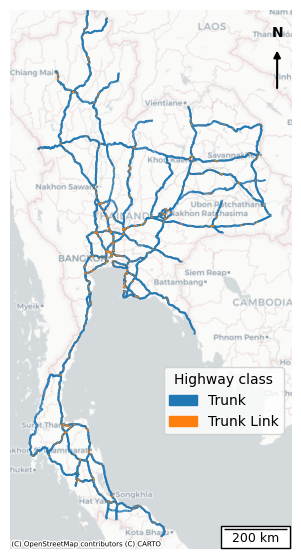

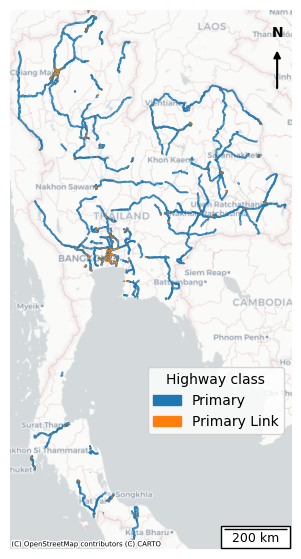

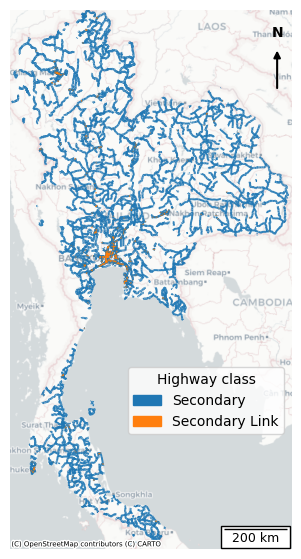

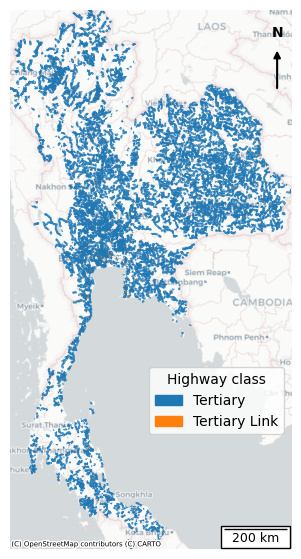

In [94]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import matplotlib.patches as mpatches
from pathlib import Path

# --- If you don't already have these helpers, uncomment this block ---
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
# from matplotlib.font_manager import FontProperties
# import math
# def _nice_length_m(data_width_m):
#     target = data_width_m / 5.0
#     exp = int(math.floor(math.log10(target))) if target > 0 else 0
#     base = target / (10 ** exp)
#     for b in (1, 2, 5, 10):
#         if base <= b:
#             return b * (10 ** exp)
#     return 10 * (10 ** exp)
# def add_scalebar(ax, loc="lower left", font_size=9, pad=0.2):
#     xmin, xmax = ax.get_xlim()
#     length_m = _nice_length_m(max(xmax - xmin, 1))
#     label = f"{int(length_m/1000)} km" if length_m >= 1000 else f"{int(length_m)} m"
#     sb = AnchoredSizeBar(ax.transData, length_m, label, loc,
#                          pad=pad, color='black', frameon=True,
#                          size_vertical=max((xmax - xmin), 1) * 0.003,
#                          fontproperties=FontProperties(size=font_size))
#     ax.add_artist(sb)
# def add_north_arrow(ax, xy=(0.08, 0.82), size=0.08, text="N", text_size=10):
#     ax.annotate("", xy=(xy[0], xy[1] + size), xytext=xy,
#                 xycoords="axes fraction", textcoords="axes fraction",
#                 arrowprops=dict(arrowstyle="-|>", linewidth=1.5, color="black"))
#     ax.text(xy[0], xy[1] + size + 0.015, text,
#             transform=ax.transAxes, ha="center", va="bottom",
#             fontsize=text_size, fontweight="bold")

# ---------- config ----------
pairs = [
    ("motorway",  "motorway_link"),
    ("trunk",     "trunk_link"),
    ("primary",   "primary_link"),
    ("secondary", "secondary_link"),
    ("tertiary",  "tertiary_link"),
]
main_color = "tab:blue"
link_color = "tab:orange"
outdir = Path("fig/")
outdir.mkdir(parents=True, exist_ok=True)

# ---------- prep ----------
rn_3857 = coverage.to_crs(3857)
all_bounds = rn_3857.total_bounds  # for consistent extent
xmin, ymin, xmax, ymax = all_bounds

for main, link in pairs:
    sub_main = rn_3857[rn_3857["fclass"] == main]
    sub_link = rn_3857[rn_3857["fclass"] == link]

    if sub_main.empty and sub_link.empty:
        # nothing to plot for this pair
        continue

    fig, ax = plt.subplots(figsize=(10, 7))

    # plot main first (thicker), then link (thinner)
    if not sub_main.empty:
        sub_main.plot(ax=ax, color=main_color, linewidth=1.4, alpha=0.9, zorder=3)
    if not sub_link.empty:
        sub_link.plot(ax=ax, color=link_color, linewidth=1.0, alpha=0.9, zorder=3)

    # basemap + consistent extent
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_axis_off()

    # legend (inside map, lower-right; nudge up with bbox_to_anchor)
    handles = []
    if not sub_main.empty:
        handles.append(mpatches.Patch(color=main_color, label=main.title()))
    if not sub_link.empty:
        handles.append(mpatches.Patch(color=link_color, label=link.replace("_", " ").title()))
    ax.legend(handles=handles, title="Highway class",
              loc="lower right", bbox_to_anchor=(1.0, 0.20), frameon=True)

    # north arrow + scalebar
    add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)
    add_scalebar(ax, loc="lower right")

    # title = f"{main.title()} & {link.replace('_', ' ').title()}"
    # ax.set_title(title, fontsize=13, pad=6)

    # save
    fname = f"coverage_pair_{main}.png"
    fig.savefig(outdir / fname, dpi=300, bbox_inches="tight", pad_inches=0)
    plt.show()
    plt.close(fig)


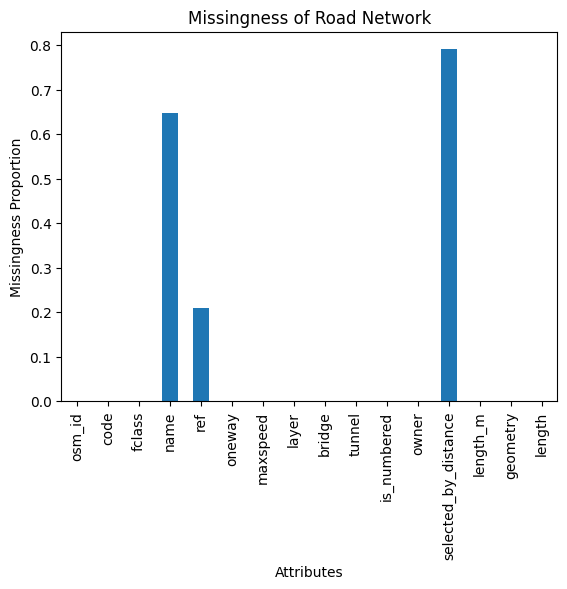

In [95]:
missingness = coverage.isna().mean()
missingness.plot(kind='bar')
plt.title('Missingness of Road Network')
plt.xlabel('Attributes')
plt.ylabel('Missingness Proportion')
plt.show()

In [ ]:
# plot both accident and coverage map

# ---------- helpers ----------
def _nice_length_m(data_width_m):
    """Pick a nice scalebar length (1/2/5 × 10^n) ~ 1/5 of axis width."""
    target = data_width_m / 5.0
    import math
    exp = int(math.floor(math.log10(target))) if target > 0 else 0
    base = target / (10 ** exp)
    for b in (1, 2, 5, 10):
        if base <= b:
            return b * (10 ** exp)
    return 10 * (10 ** exp)

def add_scalebar(ax, loc="lower left", font_size=9, pad=0.2):
    """Add a scalebar (meters) to an EPSG:3857 axis."""
    xmin, xmax = ax.get_xlim()
    length_m = _nice_length_m(xmax - xmin)
    label = f"{int(length_m/1000)} km" if length_m >= 1000 else f"{int(length_m)} m"
    fp = FontProperties(size=font_size)
    sb = AnchoredSizeBar(ax.transData, length_m, label, loc,
                         pad=pad, color='black', frameon=True,
                         size_vertical=(xmax - xmin) * 0.003,
                         fontproperties=fp)
    ax.add_artist(sb)

def add_north_arrow(ax, xy=(0.8, 0.82), size=0.08, text="N", text_size=10):
    """Add a simple north arrow in axes fraction coords."""
    ax.annotate("", xy=(xy[0], xy[1] + size), xytext=xy,
                xycoords="axes fraction", textcoords="axes fraction",
                arrowprops=dict(arrowstyle="-|>", linewidth=1.5, color="black"))
    ax.text(xy[0], xy[1] + size + 0.015, text,
            transform=ax.transAxes, ha="center", va="bottom",
            fontsize=text_size, fontweight="bold")

# ---------- categorical plotting ----------
unique_vals = coverage['fclass'].unique()
colors = plt.cm.tab10.colors  # 10-color palette
color_map = {val: colors[i % len(colors)] for i, val in enumerate(unique_vals)}

fig, ax = plt.subplots(figsize=(12, 8))

for val, color in color_map.items():
    subset = coverage[coverage['fclass'] == val].to_crs(epsg=3857)
    subset.plot(ax=ax, color=color, linewidth=1, alpha=0.7, label=val)

# basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)

# legend
handles = [mpatches.Patch(color=color, label=val) for val, color in color_map.items()]
ax.legend(handles=handles, title="Highway type", loc="lower right", bbox_to_anchor=(1, 0.1))

# scale + north arrow
add_scalebar(ax, loc="lower right")
add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)


ax.set_axis_off()
plt.tight_layout()
plt.savefig('fig/TRAMS_coverage.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


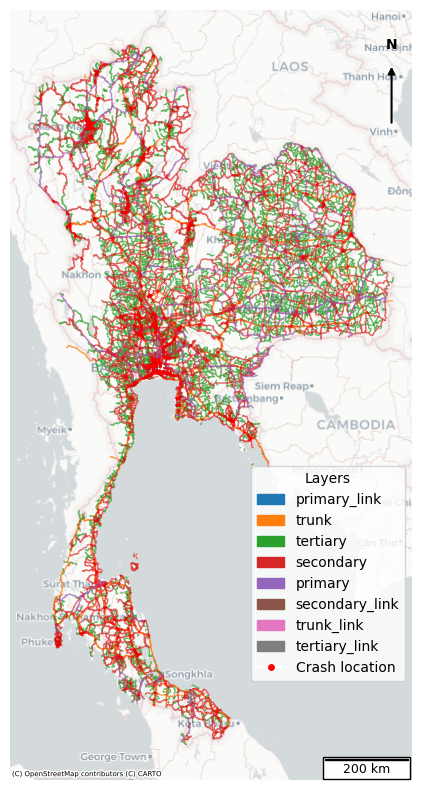

In [39]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.font_manager import FontProperties

# --- assume `coverage` is the HOTOSM roads GeoDataFrame (EPSG:4326)
# --- and `gdf_th` are the TRAMS crash points (EPSG:4326)

# Reproject once
coverage_3857 = coverage.to_crs(3857)
crashes_3857  = accidents.to_crs(3857)   # crash locations

# ---------- categorical plotting ----------
unique_vals = coverage_3857['fclass'].unique()
colors = plt.cm.tab10.colors  # 10-color palette
color_map = {val: colors[i % len(colors)] for i, val in enumerate(unique_vals)}

fig, ax = plt.subplots(figsize=(12, 8))

# plot roads by class
for val, color in color_map.items():
    subset = coverage_3857[coverage_3857['fclass'] == val]
    if not subset.empty:
        subset.plot(ax=ax, color=color, linewidth=1, alpha=0.7, zorder=2)

# basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)

# --- overlay crash points ---
# small, slightly transparent red dots so they show on light basemap
crashes_3857.plot(ax=ax, markersize=.01, color="red", alpha=0.6, zorder=3)

# legend (roads + crash points)
road_handles = [mpatches.Patch(color=color, label=val) for val, color in color_map.items()]
crash_handle = Line2D([0], [0], marker='o', color='w', label='Crash location',
                      markerfacecolor='red', markersize=6)
handles = road_handles + [crash_handle]
ax.legend(handles=handles, title="Layers", loc="lower right", bbox_to_anchor=(1, 0.12), frameon=True)

# scale + north arrow
add_scalebar(ax, loc="lower right")
add_north_arrow(ax, xy=(0.95, 0.85), size=0.08)

ax.set_axis_off()
plt.tight_layout()
# plt.savefig('fig/TRAMS_coverage_with_crashes.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [44]:
provinces

PROV_CODE        PROV_NAMT                 PROV_NAME  Area_km2_  \
0         10    กรุงเทพมหานคร                   BANGKOK    1568.95   
1         11      สมุทรปราการ              SAMUT PRAKAN     960.09   
2         12          นนทบุรี                NONTHABURI     633.25   
3         13         ปทุมธานี              PATHUM THANI    1520.06   
4         14  พระนครศรีอยุธยา  PHRA NAKHON SI AYUTTHAYA    2534.07   
..       ...              ...                       ...        ...   
72        92             ตรัง                     TRANG    4882.19   
73        93           พัทลุง               PHATTHALUNG    3764.62   
74        94          ปัตตานี                   PATTANI    1953.05   
75        95             ยะลา                      YALA    4482.17   
76        96         นราธิวาส                NARATHIWAT    4483.92   

                                             geometry  
0   POLYGON ((11199433.578 1569055.756, 11199462.8...  
1   POLYGON ((11213258.856 1541925.315, 11213293.1...  
2   POLYGON ((11174308.445 1572937.859, 11174812.4...  
3   POLYGON ((11231199.247 1603108.103, 11231206.3...  
4   POLYGON ((11193192.252 1651214.035, 11193230.4...  
..                                                ...  
72  MULTIPOLYGON (((11070162.704 782868.179, 11070...  
73  POLYGON ((11118990.485 881301.737, 11118998.61...  
74  POLYGON ((11275881.778 775430.683, 11276014.48...  
75  POLYGON ((11275854.488 745429.876, 11275961.53...  
76  POLYGON ((11313654.313 739277.637, 11313689.54...  

[77 rows x 5 columns]

/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_74749/1912689420.py:68: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox = gpd.GeoSeries([prov.unary_union.envelope], crs=provinces.crs)
/var/folders/08/36_394xj1plgkpr172kjs8mr0000gn/T/ipykernel_74749/1912689420.py:68: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox = gpd.GeoSeries([prov.unary_union.envelope], crs=provinces.crs)


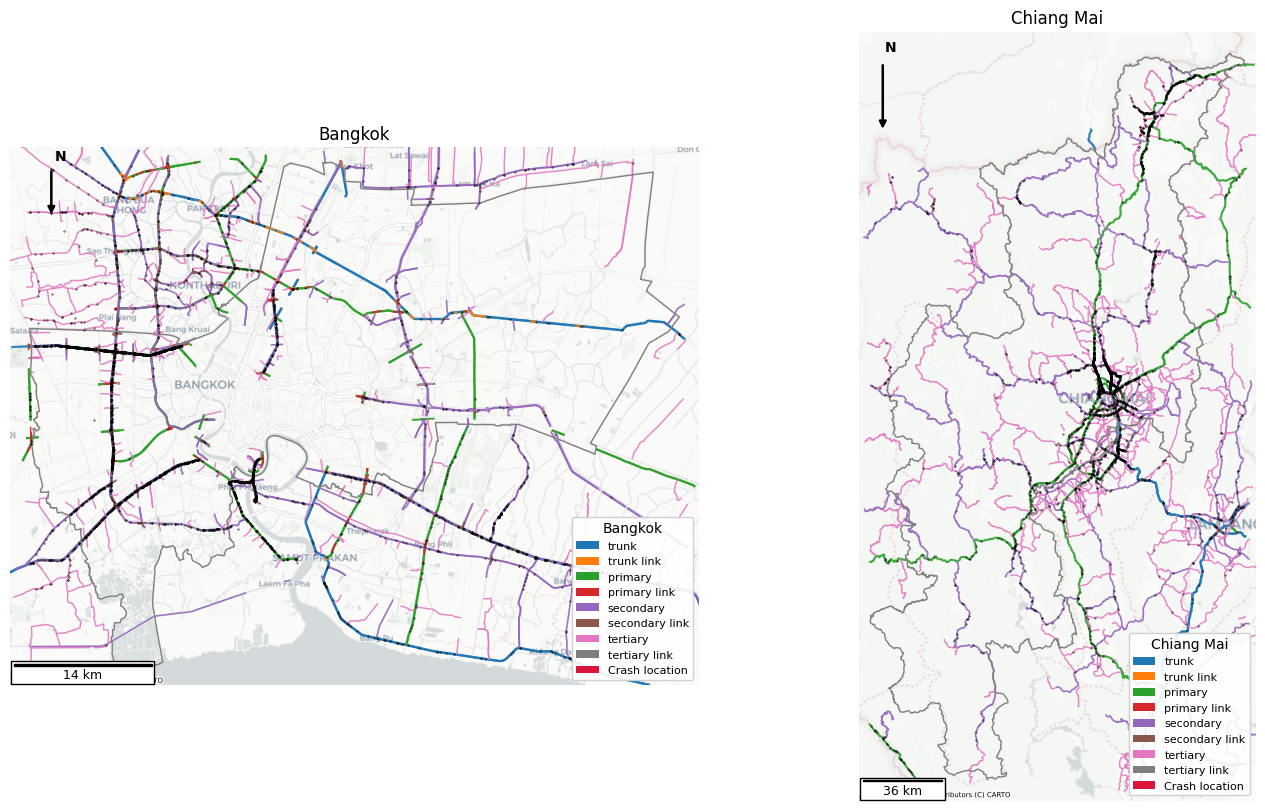

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

# --- inputs you already have ---
# provinces: GeoDataFrame of Thai provinces (EPSG:4326)
# coverage:  GeoDataFrame of OSM roads with column 'fclass' (EPSG:4326)
# gdf:       motorcycle crash points with geometry (EPSG:4326)

# Consistent CRS
provinces = provinces.to_crs(3857)
coverage  = coverage.to_crs(3857)
gdf       = accidents.to_crs(3857)

# Style for each road class
road_colors = {
    "trunk":          "#1f77b4",
    "trunk_link":     "#ff7f0e",
    "primary":        "#2ca02c",
    "primary_link":   "#d62728",
    "secondary":      "#9467bd",
    "secondary_link": "#8c564b",
    "tertiary":       "#e377c2",
    "tertiary_link":  "#7f7f7f",
}
road_widths = {
    "trunk": 1.6, "trunk_link": 1.2, "primary": 1.5, "primary_link": 1.1,
    "secondary": 1.2, "secondary_link": 1.0, "tertiary": 1.0, "tertiary_link": 0.9
}

def add_north(ax, xy=(0.06, 0.92), size=0.08):
    ax.annotate("", xy=(xy[0], xy[1]-size), xytext=xy, xycoords="axes fraction",
                arrowprops=dict(arrowstyle="-|>", color="black", lw=1.8))
    ax.text(xy[0]+0.005, xy[1]+0.01, "N", transform=ax.transAxes,
            ha="left", va="bottom", fontsize=10, fontweight="bold")

def add_scalebar_mercator(ax, loc="lower left"):
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    from matplotlib.font_manager import FontProperties
    xmin, xmax = ax.get_xlim()
    length = (xmax - xmin) / 5.0  # ~1/5 width
    label = f"{int(length/1000)} km"
    fp = FontProperties(size=9)
    sb = AnchoredSizeBar(ax.transData, length, label, loc,
                         pad=0.2, color='black', frameon=True,
                         size_vertical=(xmax-xmin)*0.003, fontproperties=fp)
    ax.add_artist(sb)

def plot_city(ax, province_name, point_size=5):
    # province bbox (no clipping)
    prov = provinces[provinces["PROV_NAME"].str.contains(province_name, case=False, na=False)]
    if prov.empty:
        prov = provinces[provinces["PROV_NAME"].str.contains(province_name, case=False, na=False)]
    if prov.empty:
        raise ValueError(f"Province '{province_name}' not found in attributes.")

    minx, miny, maxx, maxy = prov.total_bounds
    pad_x = (maxx - minx) * 0.03
    pad_y = (maxy - miny) * 0.03
    ax.set_xlim(minx - pad_x, maxx + pad_x)
    ax.set_ylim(miny - pad_y, maxy + pad_y)

    # basemap at bottom
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, attribution_size=5, zorder=0)

    # draw roads (only those intersecting bbox, but not clipping)
    bbox = gpd.GeoSeries([prov.unary_union.envelope], crs=provinces.crs)
    roads_view = coverage[coverage.intersects(bbox.geometry.iloc[0].buffer(0))]

    for cls, color in road_colors.items():
        seg = roads_view[roads_view["fclass"] == cls]
        if not seg.empty:
            seg.plot(ax=ax, color=color, linewidth=road_widths[cls], alpha=0.9, zorder=2)

    # draw province outline with no fill (this avoids grey blocks)
    prov.boundary.plot(ax=ax, color="grey", linewidth=1.0, zorder=3)

    # crash points within bbox
    pts_view = gdf[gdf.intersects(bbox.geometry.iloc[0])]
    if not pts_view.empty:
        pts_view.plot(
            ax=ax,
            color="black",
            markersize=1,   # adjust size for clarity
            alpha=0.4,
            marker="x",     # change to "*" if you prefer stars
            zorder=4
        )
    # pts_view = gdf[gdf.intersects(bbox.geometry.iloc[0])]
    # if not pts_view.empty:
    #     pts_view.plot(ax=ax, color="grey", markersize=.5, alpha=0.2, zorder=4)

    # legend
    handles = [Patch(facecolor=road_colors[k], edgecolor='none', label=k.replace("_", " "))
               for k in road_colors]
    handles.append(Patch(facecolor="crimson", edgecolor="none", label="Crash location"))
    leg = ax.legend(handles=handles, title=province_name, loc="lower right",
                    frameon=True, fontsize=8)
    leg.get_frame().set_alpha(0.9)

    add_north(ax, xy=(0.06, 0.96), size=0.09)
    add_scalebar_mercator(ax, loc="lower left")
    ax.set_axis_off()

# ---- Make the two maps ----
fig, axes = plt.subplots(1, 2, figsize=(14, 8), constrained_layout=True)

plot_city(axes[0], "Bangkok")      # or "Bangkok Metropolis" depending on your shapefile field
axes[0].set_title("Bangkok", fontsize=12)

plot_city(axes[1], "Chiang Mai")
axes[1].set_title("Chiang Mai", fontsize=12)

plt.show()


In [16]:
coverage

osm_id  code          fclass                       name      ref  \
0        11820660  5133    primary_link              ถนนงามวงศ์วาน      302   
1        12526576  5112           trunk  ถนนวงแหวนรอบเมืองพิษณุโลก      126   
2        12526578  5115        tertiary                ถนนชายกว๊าน  พย.3029   
3        12526580  5112           trunk            ถนนยันตรกิจโกศล      101   
4        12873887  5114       secondary                ถนนสุวรรณศร     3649   
...           ...   ...             ...                        ...      ...   
85327  1425712075  5134  secondary_link                       None     None   
85328  1425882188  5115        tertiary            ถนนบางเชือกหนัง     None   
85329  1426145338  5113         primary                       None     None   
85330  1426550178  5114       secondary                       None     None   
85331  1426619273  5134  secondary_link                       None     None   

      oneway  maxspeed  layer bridge tunnel  is_numbered    owner  \
0          F         0      0      F      F         True      DOH   
1          F         0      0      F      F         True      DOH   
2          B         0      0      F      F         True      DRR   
3          F         0      0      F      F         True      DOH   
4          F         0      0      F      F         True      DOH   
...      ...       ...    ...    ...    ...          ...      ...   
85327      B         0      0      F      F        False  unknown   
85328      F         0      0      F      F        False  unknown   
85329      B         0      0      F      F        False  unknown   
85330      B         0      0      F      F        False  unknown   
85331      F         0      0      F      F        False  unknown   

      selected_by_distance     length_m  \
0                     None    60.136784   
1                     None  2509.786548   
2                     None  1722.075966   
3                     None  2156.977272   
4                     None    84.303310   
...                    ...          ...   
85327                 True     7.646983   
85328                 True    42.680967   
85329                 True    15.340613   
85330                 True    13.479175   
85331                 True    12.437502   

                                                geometry  
0      LINESTRING (666596.017 1532403.247, 666575.607...  
1      LINESTRING (643441.167 1863088.649, 643597.616...  
2      LINESTRING (595064.257 2119261.377, 595064.843...  
3      LINESTRING (683889.837 2054376.106, 683895.351...  
4      LINESTRING (756223.56 1563800.554, 756217.019 ...  
...                                                  ...  
85327  LINESTRING (733059.942 1436330.515, 733063.499...  
85328  LINESTRING (652476.953 1520974.059, 652466.39 ...  
85329  LINESTRING (886724.138 1782450.401, 886726.734...  
85330  LINESTRING (423672.2 895546.261, 423685.054 89...  
85331  LINESTRING (715122.786 1494758.09, 715130.273 ...  

[85332 rows x 15 columns]

# Lixelise

In [3]:
import geopandas as gpd
import numpy as np
from shapely.ops import substring

In [ ]:
gdf = coverage.to_crs("EPSG:32647")  # UTM 47N (meters), if not already
gdf["len_m"] = gdf.geometry.length

print("count:", len(gdf))
print("min/median/mean/max:", gdf["len_m"].min(), gdf["len_m"].median(), gdf["len_m"].mean(), gdf["len_m"].max())
print("quantiles (m):", gdf["len_m"].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99]).to_dict())


count: 85332
min/median/mean/max: 0.5444154539394364 258.5955782894615 1574.7531635645505 103710.2926574428
quantiles (m): {0.1: 19.66699485144079, 0.25: 47.97048216552763, 0.5: 258.5955782894615, 0.75: 1483.4564592347676, 0.9: 4521.51260078747, 0.95: 7579.773279235811, 0.99: 16523.433306952535}


In [ ]:
gdf = coverage.to_crs(32647)               # UTM 47N (meters)
gdf = gdf.explode(index_parts=False)      # break MultiLineStrings
gdf = gdf[gdf.geom_type == "LineString"]  # keep only LineStrings
gdf = gdf[gdf.length > 0]                 # drop zero-length

In [ ]:
def split_line_equal(line, target=100.0, min_len=50.0):
    L = float(line.length)
    # If the line is short, keep it as-is
    if L <= target + min_len:
        return [line]

    # initial number of ~target segments
    k = max(2, int(np.floor(L / target)))  # at least 2
    seg_len = L / k
    # if last piece would be too small, reduce k until remainder is acceptable
    # (this makes each segment a bit longer than target, but avoids tiny tails)
    while k > 1 and (L - (k-1)*seg_len) < min_len:
        k -= 1
        seg_len = L / k

    # cut at equal spacing: seg_len, 2*seg_len, ..., (k-1)*seg_len
    cuts = [i * seg_len for i in range(1, k)]
    parts = []
    prev = 0.0
    for c in cuts:
        parts.append(substring(line, prev, c, normalized=False))
        prev = c
    parts.append(substring(line, prev, L, normalized=False))
    return parts

def lixelize_equal(gdf, target=100.0, min_len=50.0, id_col=None):
    # 0) ensure projected CRS in metres
    if gdf.crs is None or not gdf.crs.is_projected:
        raise ValueError("Project your data to a metric CRS (e.g., UTM) before lixelising.")
    # 1) explode MULTILINESTRING to LineString
    gdf_ls = gdf.explode(index_parts=False)
    gdf_ls = gdf_ls[gdf_ls.geometry.geom_type == "LineString"].copy()

    cols = [c for c in gdf_ls.columns if c != "geometry"]
    out = []
    for idx, row in gdf_ls.iterrows():
        line = row.geometry
        parts = split_line_equal(line, target=target, min_len=min_len)
        for order, p in enumerate(parts):
            rec = {c: row[c] for c in cols}
            if id_col and id_col in row:
                rec["parent_id"] = row[id_col]
            rec["order"] = order
            rec["geometry"] = p
            out.append(rec)

    return gpd.GeoDataFrame(out, crs=gdf.crs)

# ---- usage ----
# roads = roads.to_crs(32647)  # make sure metres; your UTM 47N is fine
# lixels_100 = lixelize_equal(gdf, target=100.0, min_len=50.0, id_col="osm_id")
# lixels_100["len_lixel_m"] = lixels_100.geometry.length
# print(lixels_100["len_lixel_m"].describe())


count    1.340313e+06
mean     1.002578e+02
std      1.095690e+01
min      5.444155e-01
25%      1.002516e+02
50%      1.006372e+02
75%      1.015801e+02
max      1.499893e+02
Name: len_lixel_m, dtype: float64


In [49]:
lixels_50 = lixelize_equal(gdf, target=50.0, min_len=25.0, id_col="osm_id")
lixels_100 = lixelize_equal(gdf, target=100.0, min_len=50.0, id_col="osm_id")
lixels_200 = lixelize_equal(gdf, target=200.0, min_len=50.0, id_col="osm_id")
lixels_300 = lixelize_equal(gdf, target=300.0, min_len=50.0, id_col="osm_id")
lixels_500 = lixelize_equal(gdf, target=500.0, min_len=50.0, id_col="osm_id")

In [50]:
lixels_50['lixel_len_m'] = lixels_50.geometry.length
lixels_100['lixel_len_m'] = lixels_100.geometry.length
lixels_200['lixel_len_m'] = lixels_200.geometry.length
lixels_300['lixel_len_m'] = lixels_300.geometry.length
lixels_500['lixel_len_m'] = lixels_500.geometry.length

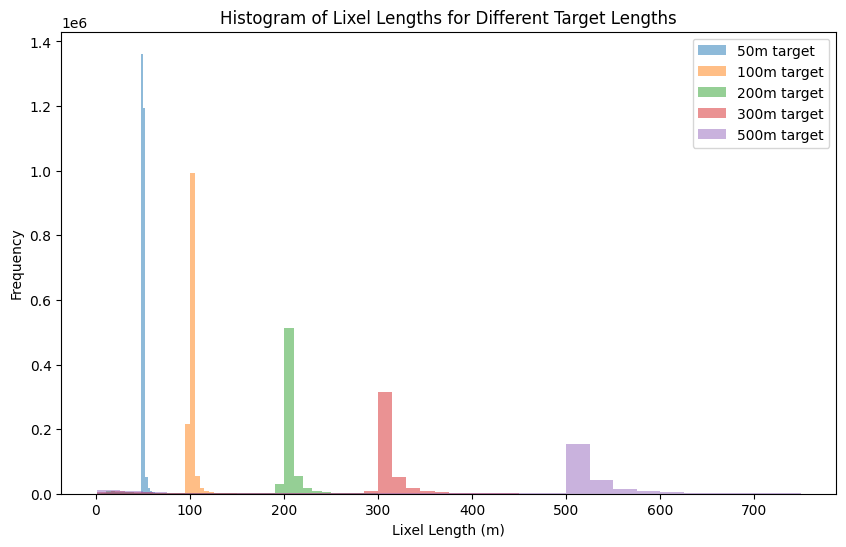

In [52]:
# histogram of lixel lengths
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(lixels_50['lixel_len_m'], bins=30, alpha=0.5, label='50m target')
plt.hist(lixels_100['lixel_len_m'], bins=30, alpha=0.5, label='100m target')
plt.hist(lixels_200['lixel_len_m'], bins=30, alpha=0.5, label='200m target')
plt.hist(lixels_300['lixel_len_m'], bins=30, alpha=0.5, label='300m target')
plt.hist(lixels_500['lixel_len_m'], bins=30, alpha=0.5, label='500m target')
plt.xlabel('Lixel Length (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Lixel Lengths for Different Target Lengths')
plt.legend()
plt.show()

In [51]:
# save all lixels to file
lixels_50.to_file("roadnetwork/tha_highway_lixels_50m.gpkg", layer="lixels_50m", driver="GPKG")
lixels_100.to_file("roadnetwork/tha_highway_lixels_100m.gpkg", layer="lixels_100m", driver="GPKG")
lixels_200.to_file("roadnetwork/tha_highway_lixels_200m.gpkg", layer="lixels_200m", driver="GPKG")
lixels_300.to_file("roadnetwork/tha_highway_lixels_300m.gpkg", layer="lixels_300m", driver="GPKG")
lixels_500.to_file("roadnetwork/tha_highway_lixels_500m.gpkg", layer="lixels_500m", driver="GPKG")

In [ ]:
lixels_50 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_50m.gpkg', driver="GPKG")
lixels_100 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_100m.gpkg', driver="GPKG")
lixels_200 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_200m.gpkg', driver="GPKG")
lixels_300 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_300m.gpkg', driver="GPKG")
lixels_500 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_500m.gpkg', driver="GPKG")

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [26]:
lixels_50 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_lixels_50m.gpkg', driver="GPKG")


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [27]:
lixels_50['nkde_sample_id'] = lixels_50.index.astype(int) +1
lixels_100['nkde_sample_id'] = lixels_100.index.astype(int) +1
lixels_200['nkde_sample_id'] = lixels_200.index.astype(int) +1
lixels_300['nkde_sample_id'] = lixels_300.index.astype(int) +1
lixels_500['nkde_sample_id'] = lixels_500.index.astype(int) +1

In [ ]:
len(lixels_50), len(lixels_100), len(lixels_200), len(lixels_300), len(lixels_500)


(2671599, 1340313, 683015, 467521, 298206)

In [30]:
max(lixels_50['nkde_sample_id']), max(lixels_100['nkde_sample_id']), max(lixels_200['nkde_sample_id']), max(lixels_300['nkde_sample_id']), max(lixels_500['nkde_sample_id'])

(2671599, 1340313, 683015, 467521, 298206)

In [36]:
# save all lixels to file
lixels_50.to_file("roadnetwork/tha_highway_lixels_50m.gpkg", layer="lixels_50m", driver="GPKG")
lixels_100.to_file("roadnetwork/tha_highway_lixels_100m.gpkg", layer="lixels_100m", driver="GPKG")
lixels_200.to_file("roadnetwork/tha_highway_lixels_200m.gpkg", layer="lixels_200m", driver="GPKG")
lixels_300.to_file("roadnetwork/tha_highway_lixels_300m.gpkg", layer="lixels_300m", driver="GPKG")
lixels_500.to_file("roadnetwork/tha_highway_lixels_500m.gpkg", layer="lixels_500m", driver="GPKG")

## Samples

In [ ]:
def lixel_midpoints(lixels_gdf, id_col=None):
    """
    Create one point per lixel at the midpoint along the line (on-geometry).

    Parameters
    ----------
    lixels_gdf : GeoDataFrame
        LineString lixels in a metric CRS (e.g., UTM).
    id_col : str, optional
        Column name for the parent/road id to carry through.

    Returns
    -------
    GeoDataFrame
        Points at mid-arc-length for each lixel with length attributes.
    """
    if lixels_gdf.crs is None or not lixels_gdf.crs.is_projected:
        raise ValueError("Project to a metric CRS (metres) before creating midpoints.")

    out = lixels_gdf.copy()
    out["lixel_len_m"] = out.geometry.length

    # Midpoint along arc length (guaranteed on the line)
    mid_geom = out.geometry.interpolate(0.5, normalized=True)

    # Build points GDF (carry all attrs, replace geometry)
    pts = gpd.GeoDataFrame(out.drop(columns="geometry"), geometry=mid_geom, crs=out.crs)

    # Optional convenience fields
    pts["s_mid_m"] = pts["lixel_len_m"] * 0.5
    if id_col and id_col in lixels_gdf.columns:
        pts.rename(columns={id_col: "parent_id"}, inplace=True)

    # handy unique id for samples
    pts["nkde_sample_id"] = range(1, len(pts) + 1)
    return pts

# ---- usage ----
# lixels_100 is your lixel GeoDataFrame (LineString, metric CRS)
# midpoints = lixel_midpoints(lixels_100, id_col="parent_id")
# print(midpoints.head())

# save if needed
# midpoints.to_file("nkde_samples_midpoints.gpkg", layer="nkde_samples", driver="GPKG")


     osm_id  code        fclass                       name  ref oneway  \
0  11820660  5133  primary_link              ถนนงามวงศ์วาน  302      F   
1  12526576  5112         trunk  ถนนวงแหวนรอบเมืองพิษณุโลก  126      F   
2  12526576  5112         trunk  ถนนวงแหวนรอบเมืองพิษณุโลก  126      F   
3  12526576  5112         trunk  ถนนวงแหวนรอบเมืองพิษณุโลก  126      F   
4  12526576  5112         trunk  ถนนวงแหวนรอบเมืองพิษณุโลก  126      F   

   maxspeed  layer bridge tunnel  ...  owner selected_by_distance  \
0         0      0      F      F  ...    DOH                 None   
1         0      0      F      F  ...    DOH                 None   
2         0      0      F      F  ...    DOH                 None   
3         0      0      F      F  ...    DOH                 None   
4         0      0      F      F  ...    DOH                 None   

      length_m        len_m  parent_id order  lixel_len_m  \
0    60.136784    60.136784   11820660     0    60.136784   
1  2509.786548  25

In [59]:
sample_100 = lixel_midpoints(lixels_100, id_col="parent_id")
sample_50 = lixel_midpoints(lixels_50, id_col="parent_id")
sample_200 = lixel_midpoints(lixels_200, id_col="parent_id")
sample_300 = lixel_midpoints(lixels_300, id_col="parent_id")
sample_500 = lixel_midpoints(lixels_500, id_col="parent_id")

In [60]:
# save samples to file
sample_50.to_file("roadnetwork/tha_highway_nkde_samples_50m.gpkg", layer="nkde_samples_50m", driver="GPKG")
sample_100.to_file("roadnetwork/tha_highway_nkde_samples_100m.gpkg", layer="nkde_samples_100m", driver="GPKG")
sample_200.to_file("roadnetwork/tha_highway_nkde_samples_200m.gpkg", layer="nkde_samples_200m", driver="GPKG")
sample_300.to_file("roadnetwork/tha_highway_nkde_samples_300m.gpkg", layer="nkde_samples_300m", driver="GPKG")
sample_500.to_file("roadnetwork/tha_highway_nkde_samples_500m.gpkg", layer="nkde_samples_500m", driver="GPKG")


In [32]:
sample_50 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_nkde_samples_50m.gpkg', driver="GPKG")
sample_100 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_nkde_samples_100m.gpkg', driver="GPKG")
sample_200 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_nkde_samples_200m.gpkg', driver="GPKG")
sample_300 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_nkde_samples_300m.gpkg', driver="GPKG")
sample_500 = gpd.read_file('/Users/stupong/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Natchapon PhD/Upgrading/PhD/NKDE/roadnetwork/tha_highway_nkde_samples_500m.gpkg', driver="GPKG")

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver GPKG does not support open option DRIVER
  return ogr_read(


In [33]:
len(sample_50), len(sample_100), len(sample_200), len(sample_300), len(sample_500)


(2671599, 1340313, 683015, 467521, 298206)

In [34]:
max(sample_50['nkde_sample_id']), max(sample_100['nkde_sample_id']), max(sample_200['nkde_sample_id']), max(sample_300['nkde_sample_id']), max(sample_500['nkde_sample_id'])

(2671599, 1340313, 683015, 467521, 298206)